<a href="https://colab.research.google.com/github/Shubham-droid24/Capstone-Project-1/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rossmann Store Sales Prediction Capstone Project**    - 



##### **Name** - Shubham Sharma
##### **Project Type** - Regression
##### **Contribution** - Individual

# **Project Summary -**

why do we need to do this project?

**Businesses use sales forecast** to determine what revenue they will be generating in a particular timespan to empower themselves with powerful business plans and strategies. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

**Sales forecasting** refers to the process of estimating demand or sales of a particular product over a specific period of time. Sales forecasting is the process of estimating a company’s sales revenue for a specific time period – commonly a month, quarter, or year. Basically,a sales forecast is prediction of how much a company will sell in the future. 

This project involves solving a real-world business problem of sales forecasting and building up machine learning models for the same. 

**First,** I have known the Rossmann stores data having two datasets i.e Rossmann Store and Store. We are provided with historical data of 1,115 Rossmann stores in both datasets which were having different columns
and one common so, I understood all the variables and how they can be important to the target variable i.e Sales.

**Second,** I merge the two datasets for furthur analysis and extracting Year,Month,Day of year and Week of year from the Date column in order to use them for visualization purpose. In visualization, I started from univariate analysis to bivariate and multivariate analysis and in every visualization comparing sales with other variables in order to understand the relation and impact or importance of them.
From the visualization, I defined and tested three hypothesis and rejected all of them as p-value was less than significance level.

**Third,** I have done preprocessing which is important before model implementation. In this, I handled missing values and outliers
, encoding the categorical variables, some feature engineering done to create new features and remove old ones, feature selection on the basis of correlation and multicollinearity. After having selection of important features I transformed some of them, done data splitting and feature scaling. All these were important to be done as they create a great impact on the model performance.     

**Last,** I build different models and forecasted the sales for the various Rossmann stores across Europe for the recent six weeks and compared the predicted sales values of different models developed and implemented with the actual sales values. Also, I found out the factors and the most important features required to predict and influence the sales of Rossmann stores.

so, that is how flow of the project goes. 

Bold the words to remember the lines.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. 

In this project, you are provided with historical data of 1,115 Rossmann stores and you have to forecast 'Sales' column. Note that some of the stores were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

import math
import datetime as dt
from scipy.stats import *

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Datasets
Ross_store=pd.read_csv('/content/drive/MyDrive/Files/Copy of Rossmann Stores Data.csv')# change source file
Store=pd.read_csv('/content/drive/MyDrive/Files/Copy of store.csv')# change source file

### Dataset First View

In [4]:
# Ross_store Dataset First Look
Ross_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Store Dataset First Look
Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [6]:
# Ross_store Dataset Rows & Columns count
Ross_store.shape

(1017209, 9)

In [7]:
# Store Dataset Rows & Columns count
Store.shape

(1115, 10)

### Dataset Information

In [8]:
# Ross_store Dataset Info
Ross_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
# Store Dataset Info
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [10]:
# Ross_store Dataset Duplicate Value Count
len(Ross_store[Ross_store.duplicated()])

0

In [11]:
# Store Dataset Duplicate Value Count
len(Store[Store.duplicated()])

0

#### Missing Values/Null Values

In [12]:
# Ross_store Missing Values/Null Values Count
Ross_store.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
# Store Missing Values/Null Values Count
Store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

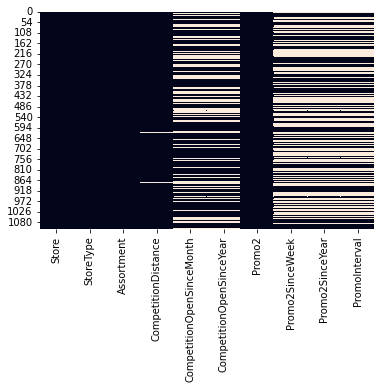

In [14]:
# Visualizing the missing values in Store Dataset
sns.heatmap(Store.isnull(),cbar=False)

### What did you know about your dataset?

There are two datasets given i.e. Rossmann Store Data and Store Data of Rossmann stores which operates over 3,000 drug stores in 7 European countries. We are provided with historical data of 1,115 Rossmann stores and you have to forecast 'Sales' column. Our goal is to predict their daily sales for up to six weeks in advance. 

Rossmann dataset has 10,17,209 rows and 9 columns having no duplicated rows and missing values in any column.

Store dataset has 1,115 rows and 10 columns having no duplicated rows but have missing values in some of the columns.

The 2 dataset has Store column common in them.

## ***2. Understanding Your Variables***

In [15]:
# Ross_store Dataset Columns
list(Ross_store.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [16]:
# Store Dataset Columns
list(Store.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [17]:
# Ross_store Dataset Describe
Ross_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [18]:
# Store Dataset Describe
Store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 



#### Rossmann Stores Data.csv - historical data including Sales
#### store.csv  - supplemental information about the stores


#### <u>Data fields</u>
#### Most of the fields are self-explanatory.

* **Id** - an Id that represents a (Store, Date) duple within the set
*  **Store** - a unique Id for each store
*  **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [19]:
# Check No. of unique values for each variable in Ross_store
for i in list(Ross_store.columns):
  print(f'No. of unique values in {i} is {Ross_store[i].nunique()}')

No. of unique values in Store is 1115
No. of unique values in DayOfWeek is 7
No. of unique values in Date is 942
No. of unique values in Sales is 21734
No. of unique values in Customers is 4086
No. of unique values in Open is 2
No. of unique values in Promo is 2
No. of unique values in StateHoliday is 5
No. of unique values in SchoolHoliday is 2


In [20]:
# Check unique values for each variable in Ross_store
for i in list(Ross_store.columns.difference(['Date'])):
  print(f'Unique values in {i} is {Ross_store[i].unique()}')

Unique values in Customers is [ 555  625  821 ... 3900   36 4065]
Unique values in DayOfWeek is [5 4 3 2 1 7 6]
Unique values in Open is [1 0]
Unique values in Promo is [1 0]
Unique values in Sales is [ 5263  6064  8314 ...   660 17815 23303]
Unique values in SchoolHoliday is [1 0]
Unique values in StateHoliday is ['0' 'a' 'b' 'c' 0]
Unique values in Store is [   1    2    3 ... 1113 1114 1115]


In [21]:
# Check No. of unique values for each variable in Store
for i in list(Store.columns):
  print(f'No. of unique values in {i} is {Store[i].nunique()}')

No. of unique values in Store is 1115
No. of unique values in StoreType is 4
No. of unique values in Assortment is 3
No. of unique values in CompetitionDistance is 654
No. of unique values in CompetitionOpenSinceMonth is 12
No. of unique values in CompetitionOpenSinceYear is 23
No. of unique values in Promo2 is 2
No. of unique values in Promo2SinceWeek is 24
No. of unique values in Promo2SinceYear is 7
No. of unique values in PromoInterval is 3


In [22]:
# Check unique values for each variable in Store
for i in list(Store.columns.difference(['CompetitionDistance'])):
  print(f'Unique values in {i} is {Store[i].unique()}')

Unique values in Assortment is ['a' 'c' 'b']
Unique values in CompetitionOpenSinceMonth is [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values in CompetitionOpenSinceYear is [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in Promo2 is [0 1]
Unique values in Promo2SinceWeek is [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values in Promo2SinceYear is [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values in PromoInterval is [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Unique values in Store is [   1    2    3 ... 1113 1114 1115]
Unique values in StoreType is ['c' 'a' 'd' 'b']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.
# Merging the Ross_store and the Store dataset 
Rsm_store=pd.merge(Ross_store,Store,how='left',on='Store')
Rsm_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [24]:
# Checking the shape
Rsm_store.shape

(1017209, 18)

In [145]:
# Sales should be the last col
columns=list(Rsm_store.columns)
columns.remove('Sales')
columns.append('Sales')
Rsm_store=Rsm_store[columns]
Rsm_store.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,1,5,2015-07-31,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5263
1,2,5,2015-07-31,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",6064
2,3,5,2015-07-31,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",8314
3,4,5,2015-07-31,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,13995
4,5,5,2015-07-31,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,4822


In [26]:
# Making a copy for data wrangling
Ro_store=Rsm_store.copy()

In [27]:
# Checking the data types
Ro_store.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
Sales                          int64
dtype: object

In [28]:
# Converting data type of Date column from object into datetime format 
Ro_store['Date']=pd.to_datetime(Ro_store['Date'],format='%Y-%m-%d')

In [29]:
# Checking unique values of State Holiday column
Ro_store['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [30]:
# Considering 0 and '0' as a single value 
Ro_store['StateHoliday']=Ro_store['StateHoliday'].replace('0',0)
Ro_store['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [31]:
# Extracting Year, Month, Week of Year and Date of Year from Date column
Ro_store['Year']=pd.DatetimeIndex(Ro_store['Date']).year
Ro_store['Month']=pd.DatetimeIndex(Ro_store['Date']).month
Ro_store['WeekOfYear']=Ro_store['Date'].dt.weekofyear
Ro_store['DayOfYear'] = Ro_store['Date'].dt.dayofyear

In [32]:
# First 5 rows
Ro_store.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,555,1,1,0,1,c,a,...,2008.0,0,NaN,NaN,NaN,5263,2015,7,31,212
1,2,5,2015-07-31,625,1,1,0,1,a,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",6064,2015,7,31,212
2,3,5,2015-07-31,821,1,1,0,1,a,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",8314,2015,7,31,212
3,4,5,2015-07-31,1498,1,1,0,1,c,c,...,2009.0,0,NaN,NaN,NaN,13995,2015,7,31,212
4,5,5,2015-07-31,559,1,1,0,1,a,a,...,2015.0,0,NaN,NaN,NaN,4822,2015,7,31,212


In [33]:
# Checking shape
Ro_store.shape

(1017209, 22)

In [34]:
# Sales should be the last col
columns=list(Ro_store.columns)
columns.remove('Sales')
columns.append('Sales')
Ro_store=Ro_store[columns]
Ro_store

In [35]:
# Checking null values
Ro_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
WeekOfYear                        0
DayOfYear                         0
Sales                             0
dtype: int64

In [36]:
# Checking data types
Ro_store.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                                  int64
Month                                 int64
WeekOfYear                            int64
DayOfYear                             int64
Sales                                 int64
dtype: object

### What all manipulations have you done and insights you found?

Some manipulations done to make dataset ready for vizualization:

1) Merging the two dataset given i.e. Rossmann Store Data and Store Data on column Store which gives the Store Number.

2) Changing the Date column from object to datetime format.

3) State Holiday having two unique values considered as 0 i.e. no State Holiday, making it a single unique value.

4) Extracting Year,Month,Day of year and Week of year from the Date column in order to use them for visualization.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

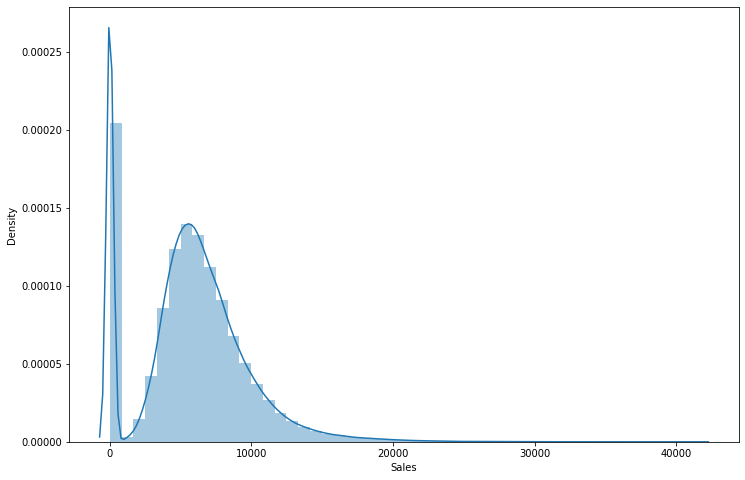

In [146]:
# Chart - 1 visualization code for histogram
plt.rcParams['figure.figsize'] = (12, 8)
sns.distplot(Ro_store['Sales'],kde=True)

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to see the distribution of 'Sales' feature.

##### 2. What is/are the insight(s) found from the chart?

Sales feature tells us the turnover of the store per day. We came to know:

1) There are dates on which sales of the store were zero due to some of the stores were temporarily closed for refurbishment.

2) Sales feature is skewed to the right and has outliers i.e. having very high sales 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sales column has very high sales on some stores at particular day of week and some of the stores were temporarily closed due to refurbishment showing no or zero sales on some dates.
 

#### Chart - 2

In [ ]:
# Checking value counts
Ro_store['StoreType'].value_counts()

a    550685
d    311212
c    136840
b     15830
Name: StoreType, dtype: int64

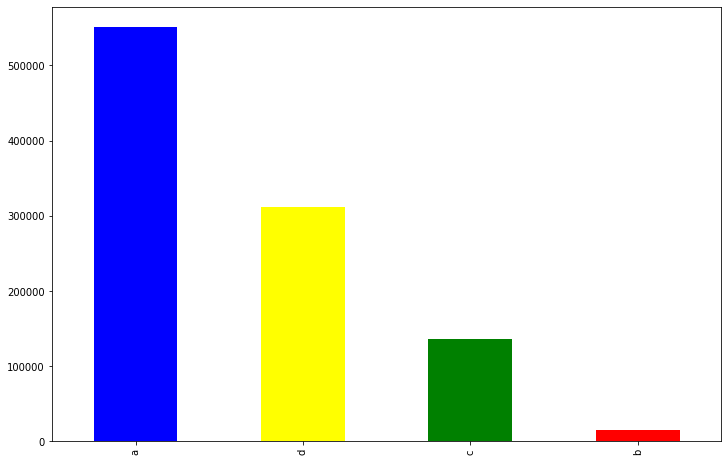

In [147]:
# Chart - 2 visualization code for bar chart
plt.rcParams['figure.figsize'] = (12, 8)
Ro_store['StoreType'].value_counts().plot(kind='bar',color=['blue','yellow','green','red'])

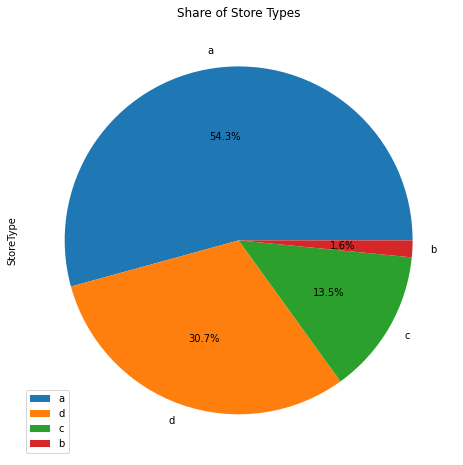

In [148]:
# visualization code for pie chart
# store types in all of the dataset
plt.rcParams['figure.figsize'] = (12, 8)
Ro_store["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%')


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. To show the counts of each store type, I have used Bar Chart.

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart to show the share i.e. percentage of each of the store type.

##### 2. What is/are the insight(s) found from the chart?

We came to know:
1)Most of the store types are of 'a' type having 54.3%. 

2)Store type 'd' having 30.7%, 'c' type having 13.5% and rest are of 'b' type(1.6%).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From these charts we got that highest number of stores are of 'a' type followed by 'd' type then 'c' type and 'b' type.

#### Chart - 3

In [ ]:
# Checking value counts
Ro_store['Assortment'].value_counts()

a    535745
c    470528
b      8294
Name: Assortment, dtype: int64

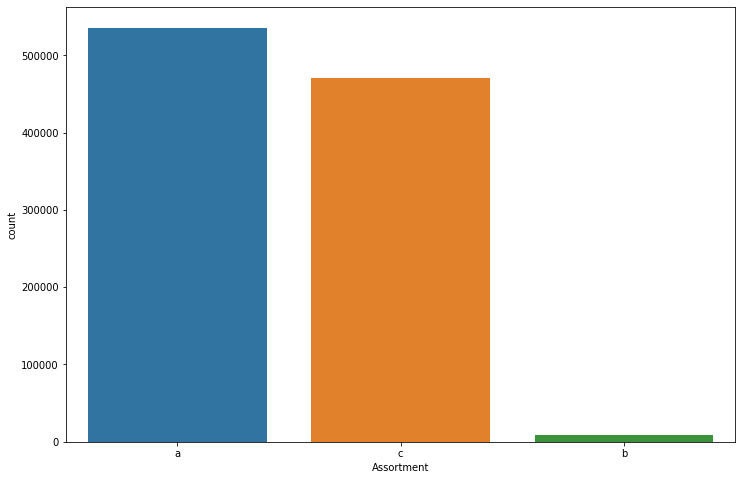

In [149]:
# Chart - 3 visualization code for bar chart
plt.rcParams['figure.figsize'] = (12, 8)
sns.countplot(Ro_store['Assortment'])

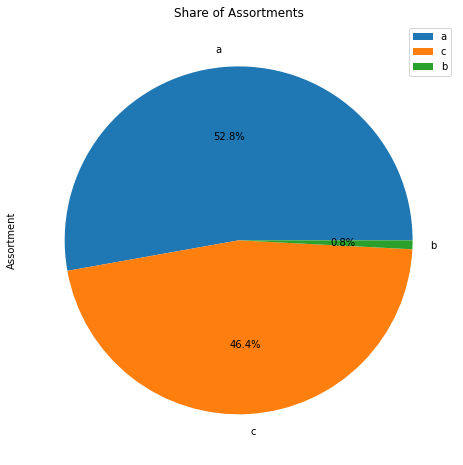

In [150]:
# visualization code for pie chart
#Type of assortments in stores in all of the dataset
plt.rcParams['figure.figsize'] = (12, 8)
Ro_store["Assortment"].value_counts().plot.pie(title='Share of Assortments', legend=True, autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. To show the counts of each store type, I have used Bar Chart.

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart to show the share i.e. percentage of each of the Assortment.

##### 2. What is/are the insight(s) found from the chart?

We came to know:

1) Most number of assortments are of 'a'(basic) type having 52.8% of share

2) 'c'(extended) type having 46.4% of share and 'b'(extra) type(0.8%). 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers. We came to know:

Basic('a') type of assortment is the most provided by the stores followed by Extended('c') type and then Extra('b') type. 

#### Chart - 4

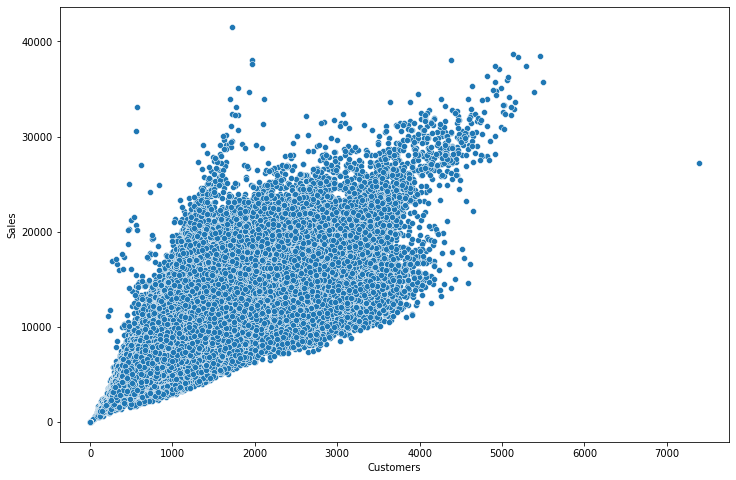

In [151]:
# Chart - 4 visualization code for scatter plot
plt.rcParams['figure.figsize'] = (12, 8)
sns.scatterplot(x=Ro_store['Customers'],y=Ro_store['Sales'])

##### 1. Why did you pick the specific chart?

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Thus, I have used the scatter plot to depict the relationship between Customers and Sales features.


##### 2. What is/are the insight(s) found from the chart?

Sales and Customers features have linear positive relation between them.
They are highly positively correlated with each other. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is usual to have positive linear relation between Sales and Customers feature.

#### Chart - 5

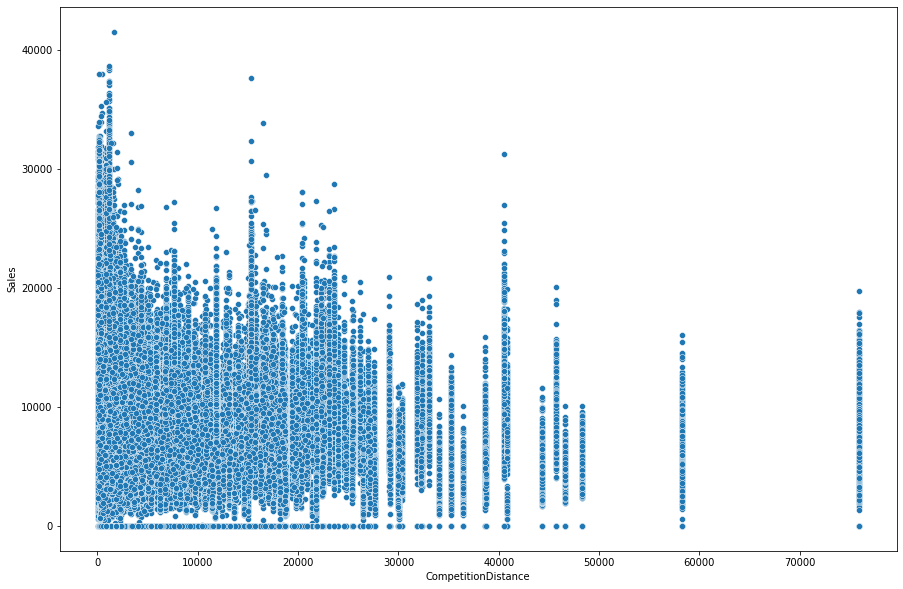

In [ ]:
# Chart - 5 visualization code for scatter plot
plt.rcParams['figure.figsize'] = (12, 8)
sns.scatterplot(x=Ro_store['CompetitionDistance'],y=Ro_store['Sales'])

##### 1. Why did you pick the specific chart?

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Thus, I have used the scatter plot to depict the relationship between CompetitionDistance and Sales features.

##### 2. What is/are the insight(s) found from the chart?

We came to know:

Mostly the competitor stores are not that far from each other and the stores which are densely located near each other have more sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This scatter plot indicates that competition between competitor stores which are close to each other is higher as compared to the which are in remote locations. 

#### Chart - 6

In [ ]:
# Checking value counts
ir=Ro_store.groupby('StateHoliday')[['Sales']].mean().sort_values(by='Sales',ascending=False)
ir

,Sales
StateHoliday,
0,5950.795704
a,290.172194
b,214.889688
c,169.145721


Text(0.5, 1.0, 'StateHoliday vs Mean of Sales')

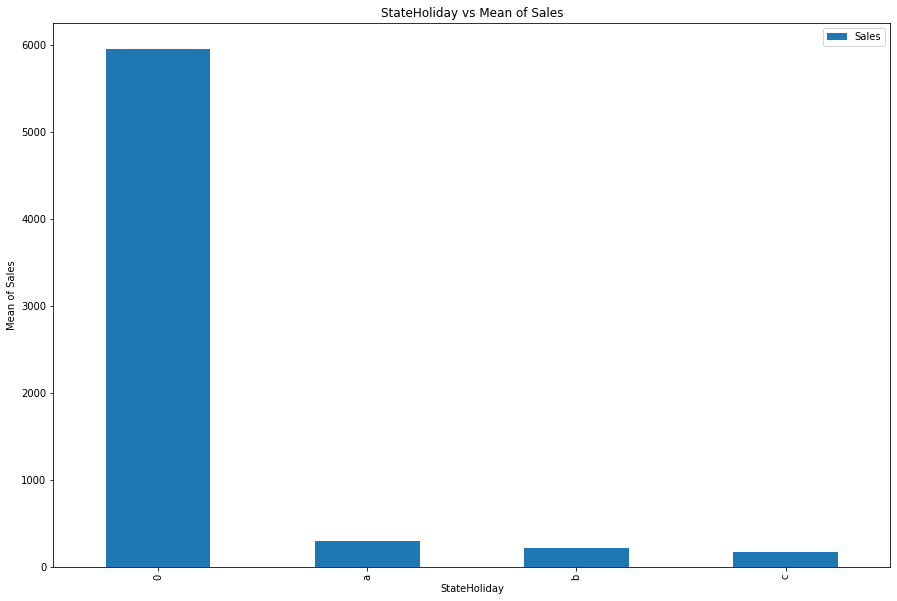

In [ ]:
# Chart - 6 visualization code for bar chart
plt.rcParams['figure.figsize'] = (12, 8)
ir.plot(kind='bar')
plt.xlabel('StateHoliday')
plt.ylabel('Mean of Sales')
plt.title('StateHoliday vs Mean of Sales')


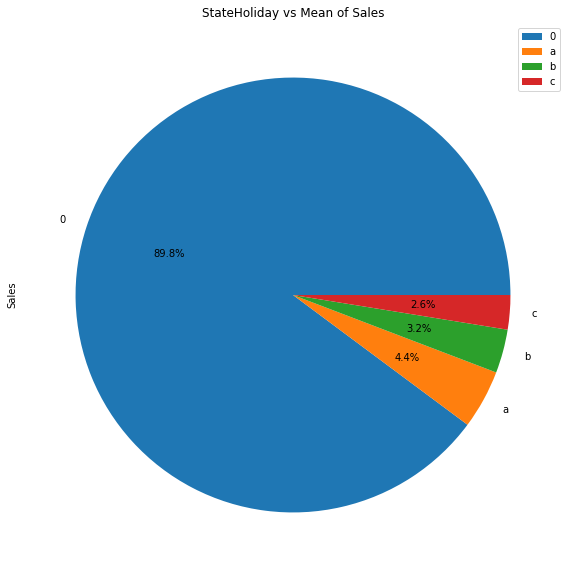

In [ ]:
# visualization code for pie chart
plt.rcParams['figure.figsize'] = (12, 8)
name='StateHoliday vs Mean of Sales'
Ro_store.groupby('StateHoliday').mean().plot(kind='pie',y='Sales',legend=True,title=name,autopct='%1.1f%%')


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. To show the mean of the sales for each of the State Holiday and no state holiday.

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart to show the share i.e. percentage of total sum of sales for each of the state holiday and no state holiday.

##### 2. What is/are the insight(s) found from the chart?

We come to know:

1) Highest mean of sales when there is no State Holiday

2) Second highest mean of sales when there is State Holiday of 'a' type i.e Public Holiday  follwed by 'b'type i.e. Easter and 'c' type i.e. Christmas.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We come to know that when there is no state holiday sales are high and when there is state holiday sales are low indicating that most of the stores may be closed on state holiday.

#### Chart - 7

In [ ]:
# Checking value counts
br=Ro_store.groupby('StoreType')[['Sales']].sum().sort_values(by='Sales',ascending=False)
br

,Sales
StoreType,
a,3161949577
d,1756794396
c,783221426
b,159231395


<Figure size 720x432 with 0 Axes>

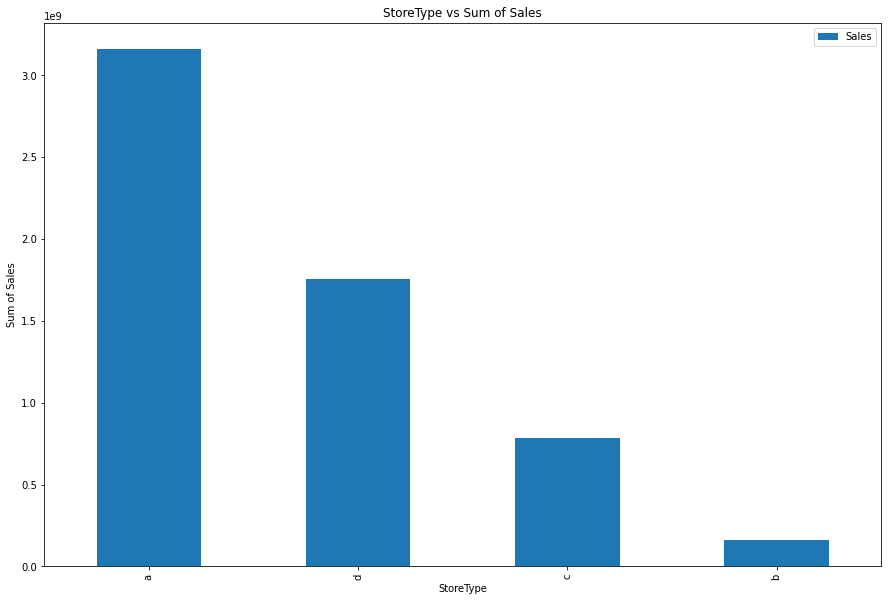

In [ ]:
# Chart -7 visualization code for bar chart
plt.rcParams['figure.figsize'] = (12, 8)
br.plot(kind='bar')
plt.xlabel('StoreType')
plt.ylabel('Sum of Sales')
plt.title('StoreType vs Sum of Sales')
plt.show()

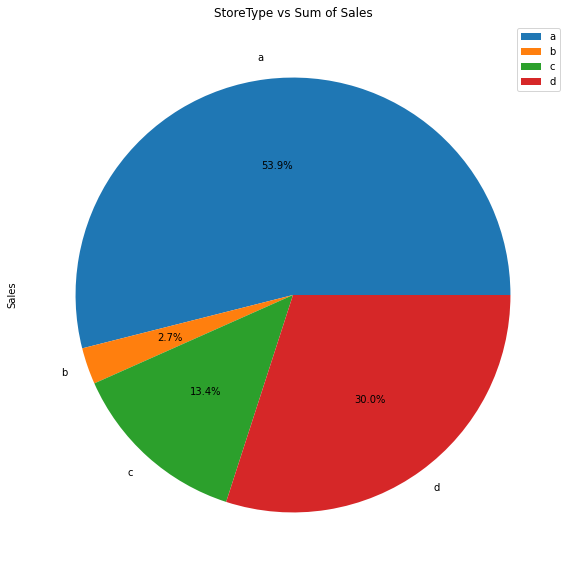

In [ ]:
# visualization code for pie chart
plt.rcParams['figure.figsize'] = (12, 8)
name='StoreType vs Sum of Sales'
Ro_store.groupby('StoreType').sum().plot(kind='pie',y='Sales',legend=True,title=name,autopct='%1.1f%%')


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. To show the sum of the sales for each of the store type, I used bar chart.

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart to show the share i.e. percentage of total sum of the sales for each of the store type.

##### 2. What is/are the insight(s) found from the chart?

We come to know:

1) Highest sum of sales is o 'a' type of store

2) Second highest sum of sales is of 'd'type followed by 'c'type and last is of 'b' type.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We noticed that highest sum of sales is of 'a' type this is due to most of the stores are of 'a' type. So, sum of the sales is not giving right criteria to evaluate about storetype and sales feature.

#### Chart - 8

In [ ]:
# Checking value counts
b_r=Ro_store.groupby('StoreType')[['Sales']].mean().sort_values(by='Sales',ascending=False)
b_r

,Sales
StoreType,
b,10058.837334
a,5741.848020
c,5723.629246
d,5645.008534


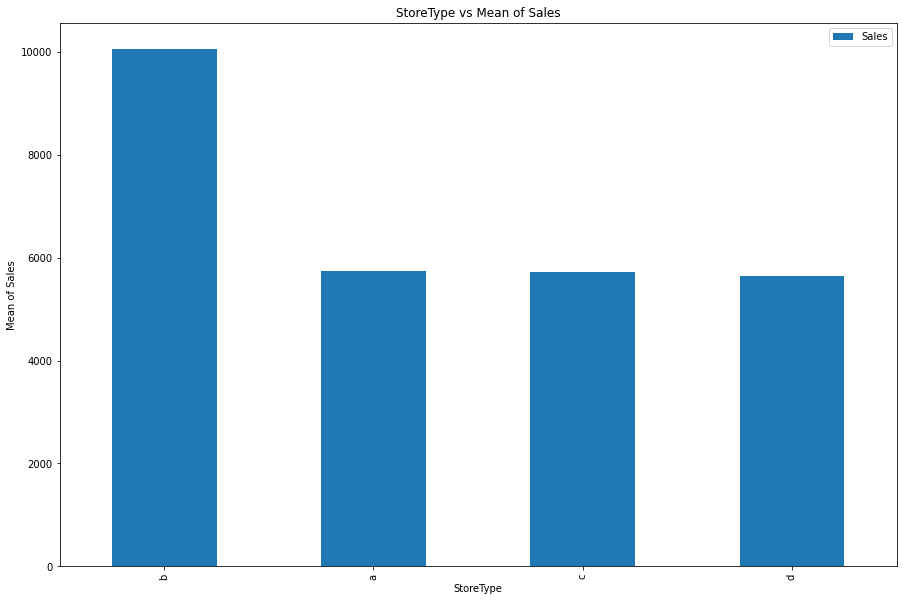

In [ ]:
# Chart -8 visualization code for bar chart
plt.rcParams['figure.figsize'] = (12, 8)
b_r.plot(kind='bar')
plt.xlabel('StoreType')
plt.ylabel('Mean of Sales')
plt.title('StoreType vs Mean of Sales')
plt.show()

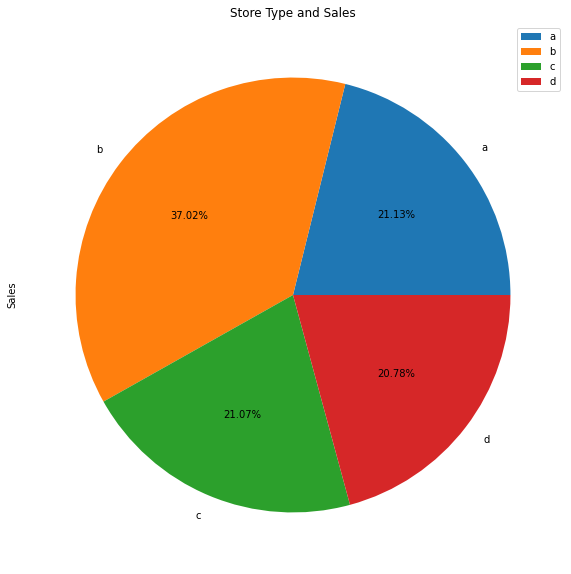

In [ ]:
# visualization code for pie chart
plt.rcParams['figure.figsize'] = (12, 8)
Ro_store.groupby("StoreType").mean().plot.pie(title='Store Type and Sales',y='Sales' ,legend=True, autopct='%1.2f%%')
plt.show()

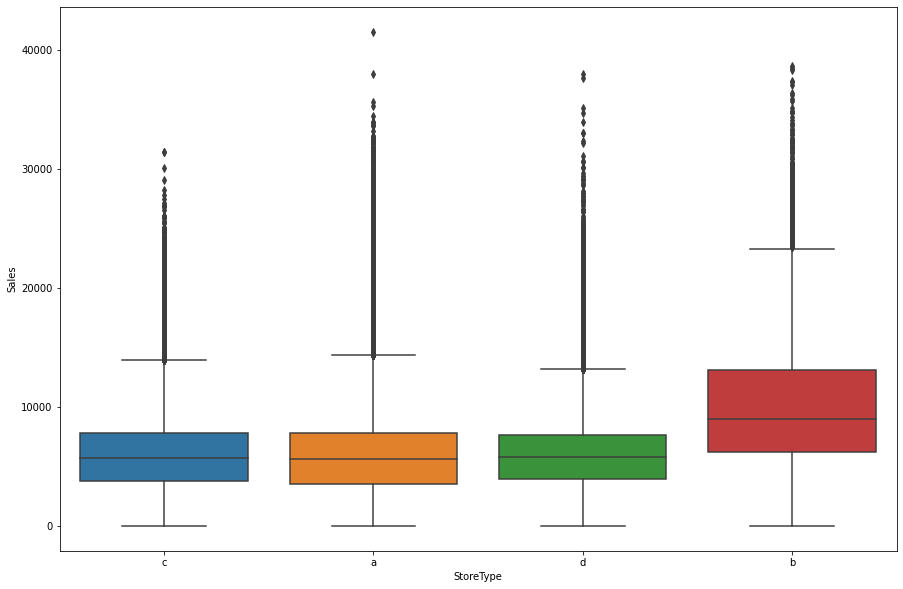

In [ ]:
# visualization code for box plot
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x='StoreType',y='Sales',data=Ro_store)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. To show the mean of the sales  for each of the store type.

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart to show the share i.e. percentage of total mean o the sales for each of the store type.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.


##### 2. What is/are the insight(s) found from the chart?

We come to know:

1) Highest mean of the sales is of the 'b' store type.

2) Stores of 'a','d'and 'c' type got almost equal mean of sales if seen percentage share.

3) Store 'b' type 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Highest sum of sales is of 'a' type of store due to having highest number of stores but not highest mean of the sales which is of 'b' store type.

This means store 'b' type has high turnover per day mostly which can be seen by its boxplot.

#### Chart - 9

In [ ]:
# Checking value counts
cr=Ro_store.groupby('DayOfWeek')[['Sales']].mean().sort_values(by='Sales',ascending=False)
cr

,Sales
DayOfWeek,
1,7812.369661
2,7008.834643
5,6726.552830
3,6559.375264
4,6250.380742
6,5853.100212
7,204.715027


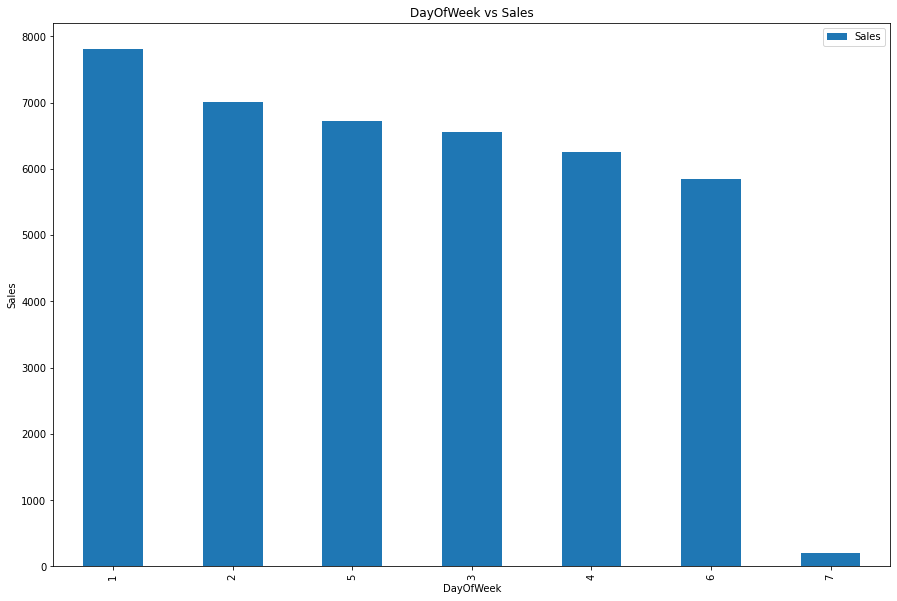

In [ ]:
# Chart - 9 visualization code for bar chart
plt.rcParams['figure.figsize'] = (12, 8)
cr.plot(kind='bar')
plt.xlabel('DayOfWeek')
plt.ylabel('Sales')
plt.title('DayOfWeek vs Sales')
plt.show()

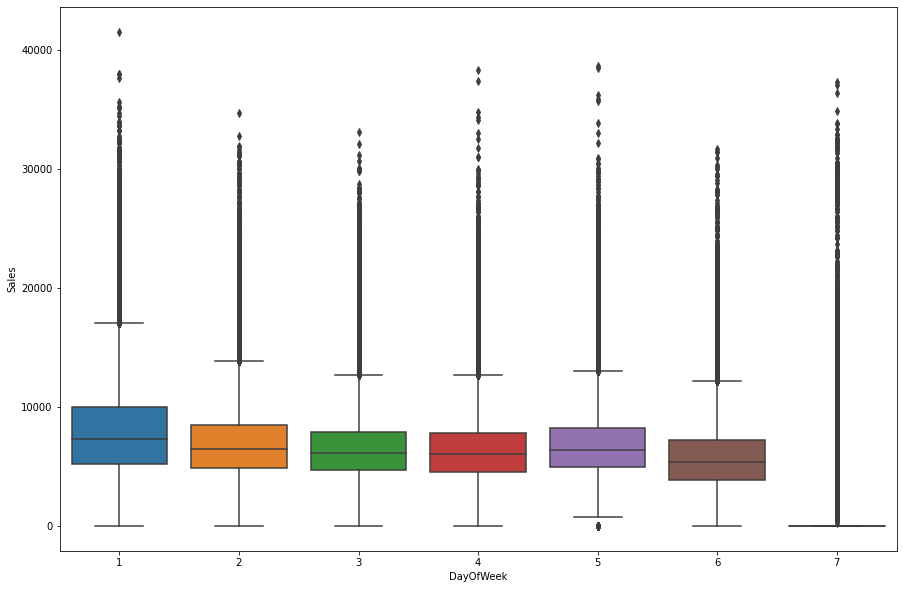

In [ ]:
# visualization code for box plot
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x='DayOfWeek',y='Sales',data=Ro_store)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. To show the mean of the sales  for each of the day of the week.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each of the day of the week in the given dataset, I used box plot of sales to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

We came to know:

1) Highest mean of sales is on the Day 1 i.e. Monday.

2) Lowest mean of sales is on the Day 7 i.e. Sunday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the week goes on, the sales decreases from highest on Day 1(Monday) to lowest on Day 7(Sunday). There is more sales on Monday, probably because stores generally remain closed on Sundays.

#### Chart - 10

In [ ]:
# Checking value counts
fr=Ro_store.groupby('Assortment')[['Sales']].mean().sort_values(by='Sales',ascending=False)
fr

,Sales
Assortment,
b,8553.931999
c,6063.611430
a,5482.368520


<Figure size 720x432 with 0 Axes>

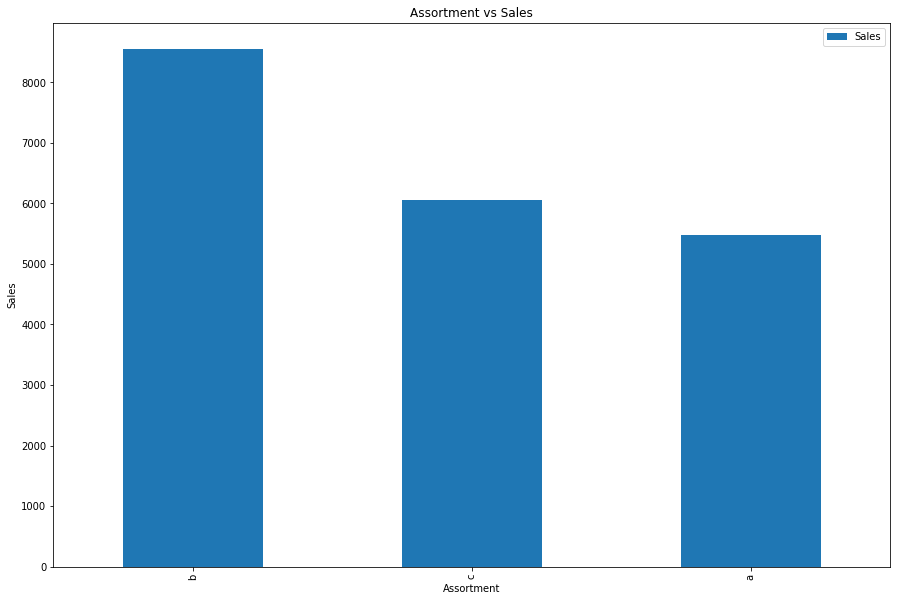

In [ ]:
# Chart - 10 visualization code for bar chart
plt.rcParams['figure.figsize'] = (12, 8)
fr.plot(kind='bar')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Assortment vs Sales')
plt.show()

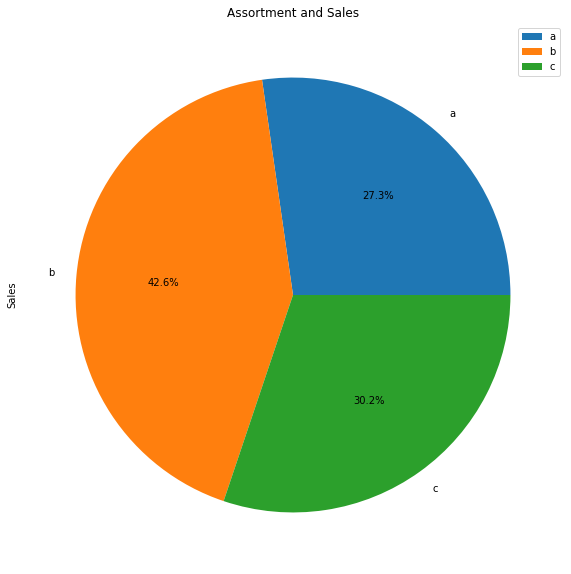

In [ ]:
# visualization code for pie chart
plt.rcParams['figure.figsize'] = (12, 8)
Ro_store.groupby("Assortment")["Sales"].mean().plot.pie(title='Assortment and Sales', legend=True, autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. To show the mean of the sales  for each of the assortment strategies.

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart to show the share i.e. percentage of total mean of the sales for each of the assortment strategies.


##### 2. What is/are the insight(s) found from the chart?

We came to know:

1) Highest mean of sales is for the 'b'(Extra) type of assortment strategy.

2) Lowest mean of sales is for the 'a'(Basic) type of assortment strategy.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As customers are buying 'b' type of assortment strategy the most, in order to meet the demands, the supply and inventory should be appropriate.

Also, we can get into what is liked by the customers about the 'b' type of assortment strategy.

#### Chart - 11

In [ ]:
# Checking value counts
gr=Ro_store.groupby('Promo')[['Sales']].mean().sort_values(by='Sales',ascending=False)
gr

,Sales
Promo,
1,7994.865176
0,4408.961297


<Figure size 720x432 with 0 Axes>

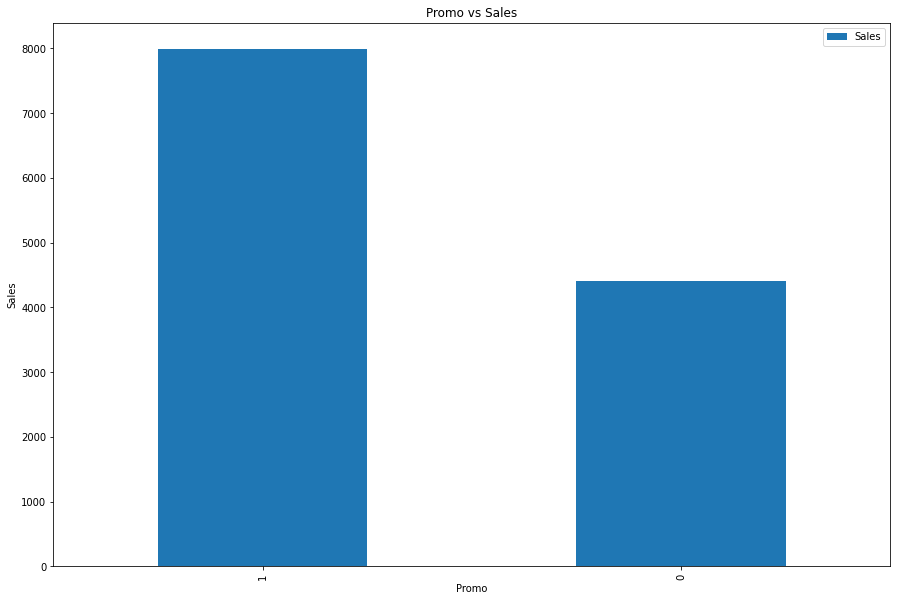

In [ ]:
# Chart - 11 visualization code for bar chart
plt.rcParams['figure.figsize'] = (12, 8)
gr.plot(kind='bar')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.title('Promo vs Sales')
plt.show()

In [ ]:
# Checking value counts
hr=Ro_store.groupby('Promo2')[['Sales']].mean().sort_values(by='Sales',ascending=False)
hr

,Sales
Promo2,
0,6128.455518
1,5427.200777


<Figure size 720x432 with 0 Axes>

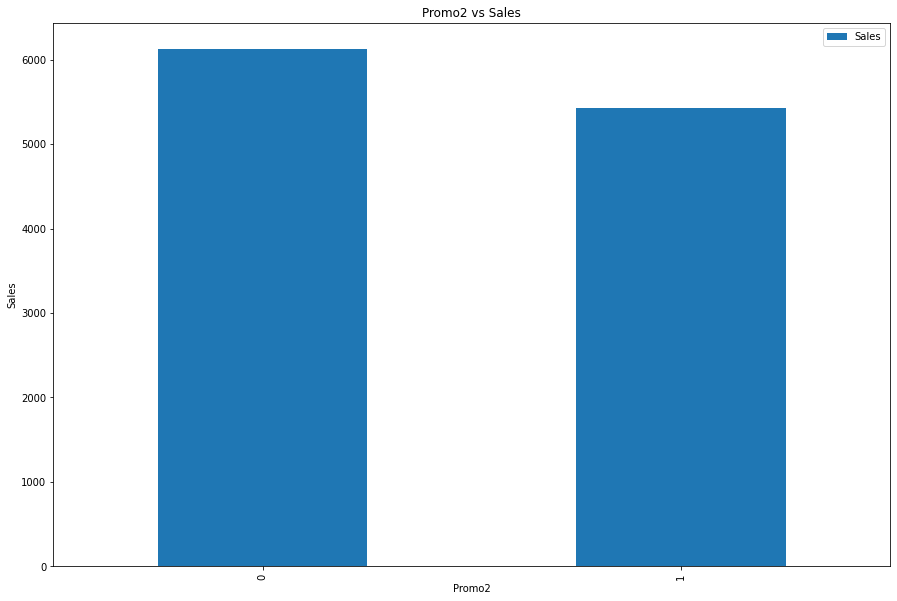

In [ ]:
# visualization code for bar chart
plt.rcParams['figure.figsize'] = (12, 8)
hr.plot(kind='bar')
plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.title('Promo2 vs Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. To show the mean of the sales when promotion is applied and not applied.Also, to show the mean of sales when promotion applied second time and not applied.

##### 2. What is/are the insight(s) found from the chart?

We come to know:

1) When promotion is applied, there is higher sales in stores as compared to when not applied.

2) When promotion 2 is applied, there is slightly lower sales in stores as compared to when not applied.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Promotion has a positie effect on Sales indicating high sales for stores with Promo=1. With Promo 2 , slightly more sales were seen without it which indicates there are many stores not participating in it.

#### Chart - 12

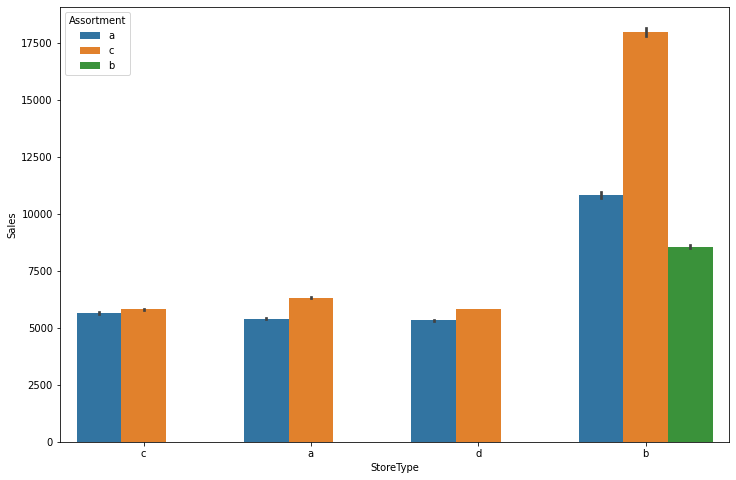

In [157]:
# Chart -12 visualization code for stacked bar chart
# Let's check the relationship between store type, assortment levels and sales
plt.rcParams['figure.figsize'] = (12, 8)
sns.barplot(x=Ro_store["StoreType"],y=Ro_store['Sales'],hue=Ro_store["Assortment"])

##### 1. Why did you pick the specific chart?

Stacked Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable for each of the different levels of a categorical variable. To show the mean of the sales for each of the assortment strategies in each of the store types.

##### 2. What is/are the insight(s) found from the chart?

We came to know:

1) Store type 'b' has all the 3 types of assortment strategies i.e. 'a'(Basic),'b'(Extra),'c'(Extended).

2) Store type 'a' and 'c' has only 2 types of assortment strategies i.e 'a'(Basic) and 'c'(Extended).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Store type 'b' has all the assortment strategies due to this mean of sales is highest for it.

We can get into why store type 'a' and 'c' are not having all the 3 assortments.



#### Chart - 13

In [155]:
# Chart -13 visualization code for line chart
sales_2013 = Ro_store[Ro_store['Year']==2013].groupby('Month')['Sales'].sum().reset_index()
sales_2014 = Ro_store[Ro_store['Year']==2014].groupby('Month')['Sales'].sum().reset_index()
sales_2015 = Ro_store[Ro_store['Year']==2015] .groupby('Month')['Sales'].sum().reset_index()

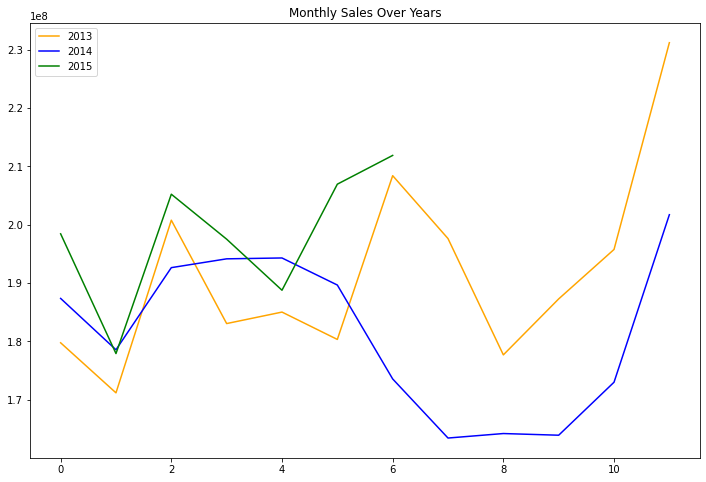

In [156]:
# plotting
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

##### 1. Why did you pick the specific chart?

Line Plot is used when we want to show how the value of something changes over time, or compare how several things change over time relative to each other.To show the sales trend over months for the year 2013,2014 and 2015.

##### 2. What is/are the insight(s) found from the chart?

We came to know:

1) For 2014,some of the sales over the months is lower as compared to 2013.

2) For 2015, sales is higher over the months as compared to both 2013 and 2014.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sales rise up by the end of the year before the holidays. 

Sales for 2014 went down for a couple of months from July to September indicating stores closed due to refurbishment.

#### Chart - 14 - Correlation Heatmap

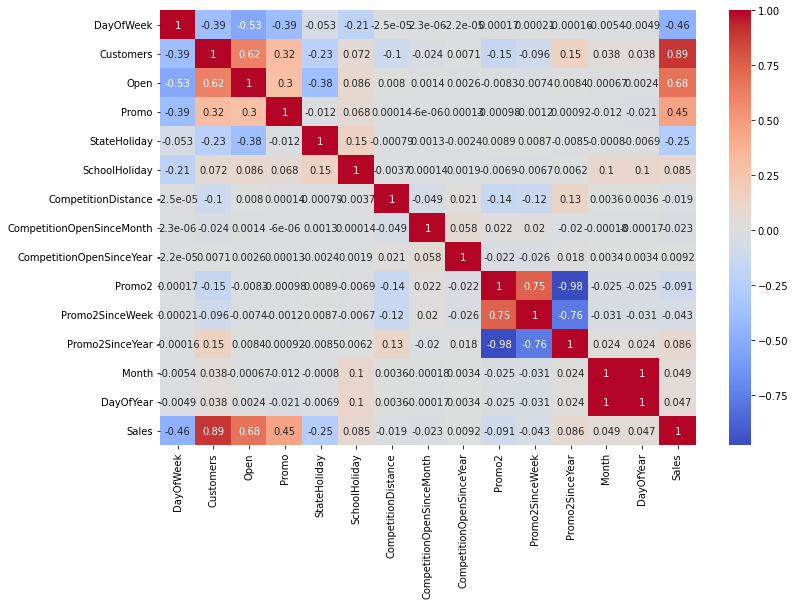

In [153]:
# Chart - 14 Correlation Heatmap visualization code

columns_to_drop = ['Store', 'Year', 'WeekOfYear']
corr_df = Ro_store.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

We came to know:

1) State Holiday has a negative correlation suggesting that stores are mostly close on state holiday indicating low sales.

2) Competition Distance has negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot.

3) Day of the week has negative correlation indicating low sales as the weekends and promo, customers and open has positive correlation.

4) Features like Promo2,Promo2sinceweek and Promo2sinceyear are showing multicollinearity and features day of week and Months  show multicollinearity

#### Chart - 15 - Pair Plot 

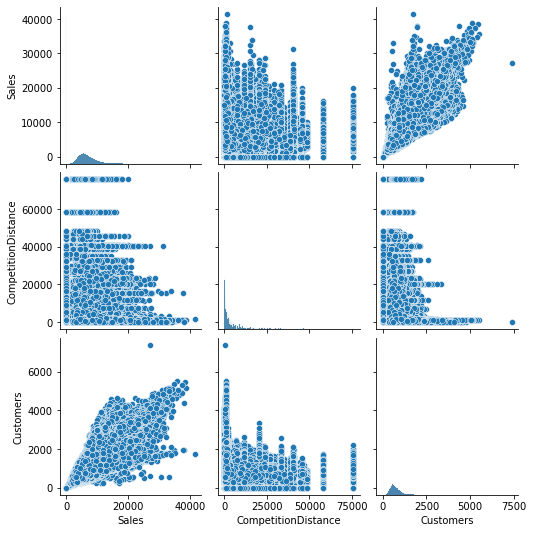

In [152]:
# Chart - 15 Pair Plot visualization code
plt.rcParams['figure.figsize'] = (12, 8)
sns.pairplot(Ro_store[['Sales','CompetitionDistance','Customers']])

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

We came to know:

1) Competition Distance has negative correlation with sales which suggests that as the distance of the competitor store increases sales reduce.

2) It is obvious that customers and sales have strong positive correlation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Average Sales of stores having competition distance upto 10 km is equal to that of stores which are far away(having competition distance greater than 10 km.  
2. Average Sales of Store Type 'b' is equal to that of Store Type 'a'.
3. Average Sales of Stores having promotion applied i.e Promo = 1 is equal to that of Stores having no promotion applied i.e Promo = 0.

### Hypothetical Statement - 1

Average Sales of stores having competition distance upto 10 km is equal to that of stores which are far away(having competition distance greater than 10 km.  

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

mean_cmpdist_upto10 = Average Sales of stores having competition distance upto 10 km

mean_cmpdist_greaterthan10 = Average Sales of stores having competition distance greater than 10 km

**Null Hypothesis:**   mean_cmpdist_greaterthan10 = mean_cmpdist_upto10

**Alternate Hypothesis :** mean_cmpdist_greaterthan10 > mean_cmpdist_upto10

**Test Type:** 2 Sample T-test(Right Tailed Test)

Significance level = 0.05

#### 2. Perform an appropriate statistical test.

In [81]:
# Finding sample size, mean and standard deviation of 2 samples 

n_upto10 = 380
n_greaterthan10 = 380
x_bar_upto10 = np.mean(Ro_store.loc[Ro_store['CompetitionDistance']<=10000,'Sales'][:380])
x_bar_greaterthan10 = np.mean(Ro_store.loc[Ro_store['CompetitionDistance']>10000,'Sales'][:380])
std_upto10 = np.std(Ro_store.loc[Ro_store['CompetitionDistance']<=10000,'Sales'][:380])
std_greaterthan10 = np.std(Ro_store.loc[Ro_store['CompetitionDistance']>10000,'Sales'][:380])

In [82]:
# Ratio of standard deviations of 2 samples(should be between 0.5 and 2)
std_upto10/std_greaterthan10

1.2075612794220143

In [83]:
# Calculating pooled standard deviation
sp2_hyp1 = ((n_upto10-1)*std_upto10**2 + (n_greaterthan10-1)*std_greaterthan10**2)/(n_upto10+n_greaterthan10-2)

sp_hyp1 = np.sqrt(sp2_hyp1)

In [84]:
# Calculating t - value
t_value_hyp1 = (x_bar_upto10-x_bar_greaterthan10)/(sp_hyp1*np.sqrt(1/n_upto10 + 1/n_greaterthan10))
t_value_hyp1

1.7015306066438254

In [85]:
# Finding p - value
p1 = round(1 - t.cdf(t_value_hyp1,n_upto10+n_greaterthan10-2),5)
p1

0.04463

As p1 < Significance level(0.05), 
Null Hypothesis rejected Successfully for p = .04463

##### Which statistical test have you done to obtain P-Value?

I have used 2 Sample T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and average sales of stores having competition distance upto 10 km is not equal to average sales of stores which are far away than 10 km. But, average sales of stores having competition distance upto 10 km is greater than average sales of stores which are far away than 10 km.

##### Why did you choose the specific statistical test?

From the Sales ditribution we can see that most of the values lie on the left side and tail is on the right side. So, the distribution is positively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, I used T-test for hypothesis testing.

### Hypothetical Statement - 2

Average Sales of Store Type 'b' is equal to that of Store Type 'a'.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

mean_storetype_b = Average Sales of Store Type 'b'

mean_storetype_a = Average Sales of Store Type 'a'

Null Hypothesis:  mean_storetype_b = mean_storetype_a

Alternate Hypothesis : mean_storetype_b > mean_storetype_a

Test Type: 2 Sample T-test(Right Tailed Test)

Significance level = 0.05

#### 2. Perform an appropriate statistical test.

In [42]:
# Finding sample size, mean and standard deviation of 2 samples
n_storetype_b = 31
n_storetype_a= 31
x_bar_storetype_b = np.mean(Ro_store.loc[Ro_store['StoreType']=='b','Sales'][:31])
x_bar_storetype_a = np.mean(Ro_store.loc[Ro_store['StoreType']=='a','Sales'][:31])
std_storetype_b = np.std(Ro_store.loc[Ro_store['StoreType']=='b','Sales'][:31])
std_storetype_a = np.std(Ro_store.loc[Ro_store['StoreType']=='a','Sales'][:31])

In [43]:
# Ratio of standard deviations of 2 samples(should be between 0.5 and 2)
std_storetype_b/std_storetype_a

1.7665212581097727

In [44]:
# Calculating pooled standard deviation
sp2_hyp2 = ((n_storetype_b-1)*std_storetype_b**2 + (n_storetype_a-1)*std_storetype_a**2)/(n_storetype_a+n_storetype_b-2)

sp_hyp2 = np.sqrt(sp2_hyp2)

In [45]:
# Calculating t - value
t_value_hyp2 = (x_bar_storetype_b-x_bar_storetype_a)/(sp_hyp2*np.sqrt(1/n_storetype_a + 1/n_storetype_b))
t_value_hyp2

3.735566907109503

In [46]:
# Finding p - value
p2 = round(1 - t.cdf(t_value_hyp2,n_storetype_a+n_storetype_b-2),5)
p2

0.00021

As p2 < Significance level(0.05), 
Null Hypothesis rejected Successfully for p = 0.00021

##### Which statistical test have you done to obtain P-Value?

I have used 2 Sample T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and average sales of Store Type 'b' is not equal to average sales of Store Type 'a'. But, average sales of Store Type 'b' is greater than average sales of Store Type 'a'

##### Why did you choose the specific statistical test?

From the Sales ditribution we can see that most of the values lie on the left side and tail is on the right side. So, the distribution is positively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, I used T-test for hypothesis testing.

### Hypothetical Statement - 3

Average Sales of Stores having promotion applied i.e Promo = 1 is equal to that of Stores having no promotion applied i.e Promo = 0.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

mean_promo = Average Sales of stores having promotion applied i.e Promo = 1 

mean_notpromo = Average Sales of stores having no promotion applied i.e Promo = 0 

Null Hypothesis:  mean_promo = mean_notpromo

Alternate Hypothesis :mean_promo > mean_notpromo

Test Type: 2 Sample T-test(Right Tailed Test)

Significance level = 0.05

#### 2. Perform an appropriate statistical test.

In [93]:
# Finding sample size, mean and standard deviation of 2 samples
n_promo= 70
n_notpromo= 70
x_bar_promo = np.mean(Ro_store.loc[(Ro_store['Promo']==1) & (Ro_store['Open']!=0),'Sales'][:70])
x_bar_notpromo = np.mean(Ro_store.loc[(Ro_store['Promo']==0) & (Ro_store['Open']!=0),'Sales'][:70])
std_promo = np.std(Ro_store.loc[(Ro_store['Promo']==1) & (Ro_store['Open']!=0),'Sales'][:70])
std_notpromo = np.std(Ro_store.loc[(Ro_store['Promo']==0) & (Ro_store['Open']!=0),'Sales'][:70])

In [94]:
# Ratio of standard deviations of 2 samples(should be between 0.5 and 2)
std_promo/std_notpromo 

0.5153608323513047

In [95]:
# Calculating pooled standard deviation
sp2_hyp3 = ((n_promo-1)*std_promo**2 + (n_notpromo-1)*std_notpromo**2)/(n_promo+n_notpromo-2)

sp_hyp3 = np.sqrt(sp2_hyp3)

In [96]:
# Calculating t - value
t_value_hyp3 = (x_bar_promo-x_bar_notpromo)/(sp_hyp3*np.sqrt(1/n_promo + 1/n_notpromo))
t_value_hyp3

3.144247199804874

In [97]:
# Finding p - value
p3 = round(1 - t.cdf(t_value_hyp3,n_storetype_a+n_storetype_b-2),5)
p3

0.00129

As p3 < Significance level(0.05), 
Null Hypothesis rejected Successfully for p = 0.00129

##### Which statistical test have you done to obtain P-Value?

I have used 2 Sample T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and average sales of stores having promotion applied i.e Promo = 1 is not equal to average sales of stores having no promotion applied i.e Promo = 0. But, average sales of stores having promotion applied i.e Promo = 1 is greater than average sales of stores having no promotion applied i.e Promo = 0.


##### Why did you choose the specific statistical test?

From the Sales ditribution we can see that most of the values lie on the left side and tail is on the right side. So, the distribution is positively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, I used T-test for hypothesis testing.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [98]:
# Handling Missing Values & Missing Value Imputation
# Checking missing values(as percentage)
Ro_store.isnull().sum()/len(Ro_store)*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Year                          0.000000
Month                         0.000000
WeekOfYear                    0.000000
DayOfYear                     0.000000
Sales                         0.000000
dtype: float64

In [99]:
# dropping the rows having missing values of Competition Distance
Ro_store.drop(index=Ro_store[Ro_store['CompetitionDistance'].isna()].index,axis=0,inplace=True)

In [100]:
# imputing competition open since month and year with the most occuring values of the columns i.e modes of those columns
Ro_store['CompetitionOpenSinceMonth'].fillna(Ro_store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
Ro_store['CompetitionOpenSinceYear'].fillna(Ro_store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [101]:
# imputing the nan values of promo2SinceYear and promo2SinceWeek with current year and current week respectively and promointerval with 0
Ro_store.loc[Ro_store['Promo2SinceYear'].isna(), 'Promo2SinceYear'] = dt.datetime.now().year
Ro_store.loc[Ro_store['Promo2SinceWeek'].isna(), 'Promo2SinceWeek'] = dt.datetime.now().isocalendar()[1]
Ro_store['PromoInterval'].fillna(value=0,inplace=True)

In [102]:
# Assigning correct data types to respective columns
Ro_store['CompetitionOpenSinceMonth']=Ro_store['CompetitionOpenSinceMonth'].astype(int)
Ro_store['CompetitionOpenSinceYear']=Ro_store['CompetitionOpenSinceYear'].astype(int)
Ro_store['Promo2SinceWeek']=Ro_store['Promo2SinceWeek'].astype(int)
Ro_store['Promo2SinceYear']=Ro_store['Promo2SinceYear'].astype(int)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing values are treated by either dropping or imputation by mode or imputing with some other value depending on the number of missing values or distribution of data.Some of the features having missing values are treated below:

CompetitionDistance- As there are less than 1% of values missing in the column hence the rows corresponding to it are dropped. 

CompetitionOpenSinceMonth- As mode of the column would tell us the most occuring month hence the rows corresponding to it are replaced with mode of the column. 

CompetitionOpenSinceYear- As mode of the column would tell us the most occuring year hence the rows corresponding to it are replaced with mode of the column.

Promo2SinceWeek, Promo2SinceYear - Replaced with current week and year wherever the rows Promo2 is 0 or False because when we want to calculate the week or year since Promo2 has applied, we get result as 0.

PromoInterval - Replaced with NaN wherever the rows Promo2 is 0 or False. 

In [103]:
# Checking missing values(as percentage)
Ro_store.isnull().sum()/len(Ro_store)*100

Store                        0.0
DayOfWeek                    0.0
Date                         0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
Year                         0.0
Month                        0.0
WeekOfYear                   0.0
DayOfYear                    0.0
Sales                        0.0
dtype: float64

In [104]:
# Checking data type
Ro_store.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
Year                                  int64
Month                                 int64
WeekOfYear                            int64
DayOfYear                             int64
Sales                                 int64
dtype: object

Treating the missing values in the CompetitionDistance, CompetitionSinceMonth, CompetitionSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval features and assigning correct data types to them.

### 2. Handling Outliers

In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

Total number of Outliers present in the Sales column are 9705.


[Text(0.5, 1.0, 'Outliers Distribution')]

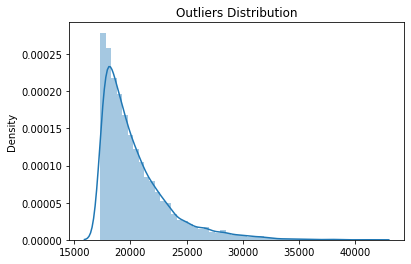

In [105]:
# Handling Outliers & Outlier treatments
# Detecting Outliers
mean_sales = np.mean(Ro_store['Sales']) # mean
std_sales = np.std(Ro_store['Sales'])   # standard deviation

#More than 3 standard deviation is an outlier
threshold = 3

# code to identify them
outliers = []
for value in Ro_store['Sales']:
    z_score = (value-mean_sales)/std_sales
    if z_score > threshold: # threshold value
        outliers.append(value)

# Total number of outliers   
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')

# Plotting the outlier distribution
sns.distplot(outliers).set(title='Outliers Distribution')

In [106]:
# Finding threshold sales value
threshold_sales_outlier=3*std_sales+mean_sales
threshold_sales_outlier

17330.171486441308

In [107]:
# Dataframe having outliers
sales_outliers = Ro_store.loc[Ro_store['Sales']> threshold_sales_outlier]
sales_outliers.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,Sales
124,125,5,2015-07-31,2041,1,1,0,1,a,a,...,2005,0,1,2023,0,2015,7,31,212,18227
250,251,5,2015-07-31,2508,1,1,0,1,a,c,...,2013,0,1,2023,0,2015,7,31,212,22205
261,262,5,2015-07-31,3669,1,1,0,1,b,a,...,2013,0,1,2023,0,2015,7,31,212,25774
319,320,5,2015-07-31,2316,1,1,0,1,a,c,...,2012,0,1,2023,0,2015,7,31,212,19898
334,335,5,2015-07-31,2592,1,1,0,1,b,a,...,2013,1,31,2013,"Jan,Apr,Jul,Oct",2015,7,31,212,17867


In [108]:
# Checking shape
sales_outliers.shape

(9705, 22)

In [109]:
# Checking shape when day of week is 7 i.e Sunday
sales_outliers.loc[(sales_outliers['DayOfWeek']==7)].shape

(271, 22)

In [110]:
# Checking shape when day of week is 7 and store type is 'b'
sales_outliers.loc[(sales_outliers['DayOfWeek']==7) & (sales_outliers['StoreType']=='b')].shape

(271, 22)

In [111]:
# Checking shape when promo is applied
sales_outliers.loc[(sales_outliers['Promo']==1)].shape

(6982, 22)

##### What all outlier treatment techniques have you used and why did you use those techniques?

From the Ro_store data we have got to know following observations:

1) Store Type 'b' opens on Day 7 i.e. on Sunday also, this means it is opened on all 7 days in a week. Having all kinds of assortments available is probably the reason why it had higher average sales than any other store type. On Sunday as all other stores are not open, all customers reach to the Store Type 'b'.

2) Most of the ouliers are when promotion is going on and they had a high number of Customers as well indicating no absurd behavior.


The primary reasons for the outliers are promotion and store type 'b'.
If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features. It is well established that there is seasonality involved so, the outliers are not removed as they play an important role in understanding the data.

### 3. Categorical Encoding

In [112]:
# Making a copy of dataset
ros_store=Ro_store.copy()

In [113]:
# Converting all unique values of state holiday as string
ros_store['StateHoliday']=ros_store['StateHoliday'].replace(0,'0')
ros_store['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [114]:
# One Hot Encoding on categorical columns
ros_store=pd.get_dummies(ros_store,columns=['DayOfWeek','StoreType','Assortment','StateHoliday'])

In [115]:
# First 5 rows
ros_store.head()

,Store,Date,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2015-07-31,555,1,1,1,1270.0,9,2008,0,...,0,1,0,1,0,0,1,0,0,0
1,2,2015-07-31,625,1,1,1,570.0,11,2007,1,...,0,0,0,1,0,0,1,0,0,0
2,3,2015-07-31,821,1,1,1,14130.0,12,2006,1,...,0,0,0,1,0,0,1,0,0,0
3,4,2015-07-31,1498,1,1,1,620.0,9,2009,0,...,0,1,0,0,0,1,1,0,0,0
4,5,2015-07-31,559,1,1,1,29910.0,4,2015,0,...,0,0,0,1,0,0,1,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy.

One-hot encoding is a common method for dealing with categorical data in machine learning. Categorical variables must be changed in the pre-processing section since machine learning models require numeric input variables. Nominal or ordinal data can be found in categorical data.

This approach creates a new column for each unique value in the original category column. The zeros and ones are subsequently put in these dummy variables (1 meaning TRUE, 0 meaning FALSE).

Because this procedure generates several new variables, it is prone to causing a large problem (too many predictors) if the original column has a large number of unique values.

Another disadvantage of one-hot encoding is that it produces multicollinearity among the various variables, lowering the model’s accuracy.

I have used this technique to encode State Holiday, Assortment, Store Type and Day of Week features. 

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [125]:
# Manipulate Features to minimize feature correlation and create new features
# Defining a function to calculate variance inflation factor(VIF) to determine Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Calculating variance inflation factor(VIF)
calc_vif(ros_store[[i for i in ros_store.columns if i not in ['Store','Date','PromoInterval','Sales','StoreType_a','DayOfWeek_1','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7','StoreType_b','StoreType_c','StoreType_d','Assortment_a','Assortment_b','Assortment_c','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c']]])

,variables,VIF
0,Customers,5.114190e+00
1,Open,9.972006e+00
2,Promo,1.877811e+00
3,SchoolHoliday,1.264318e+00
4,CompetitionDistance,1.580212e+00
5,CompetitionOpenSinceMonth,8.897849e+00
6,CompetitionOpenSinceYear,1.398365e+05
7,Promo2,3.860733e+01
8,Promo2SinceWeek,1.751806e+01
9,Promo2SinceYear,2.180284e+06


In [116]:
# Dropping the rows when stores are not open 
ros_store=ros_store.drop(index=(ros_store[ros_store['Open']==0]).index,axis=1)

In [117]:
# Checking value counts 
ros_store['Open'].value_counts()

1    842206
Name: Open, dtype: int64

In [118]:
# Dropping the Open column
ros_store=ros_store.drop(columns=['Open'],axis=1)

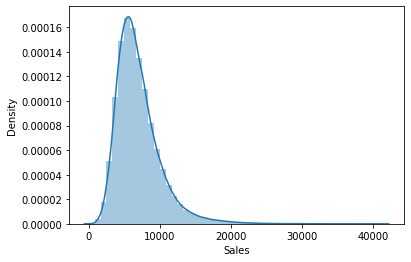

In [ ]:
# Visualizing Sales column distribution
sns.distplot(ros_store['Sales'])

In [119]:
# Combining competition open since month and year into total months
ros_store['CompetitionOpen'] = (ros_store['Year'] - ros_store['CompetitionOpenSinceYear'])*12 + (ros_store['Month'] - ros_store['CompetitionOpenSinceMonth'])
ros_store['CompetitionOpen']=ros_store['CompetitionOpen'].astype(int)
# Correcting the neg values(if any)
ros_store['CompetitionOpen'] = ros_store['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
# Dropping both the columns
ros_store.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [120]:
# Changing promo2 since year and week into total months
ros_store['Promo2Open'] = (ros_store['Year'] - ros_store['Promo2SinceYear'])*12 + (ros_store['WeekOfYear'] - ros_store['Promo2SinceWeek'])*0.230137
ros_store['Promo2Open']=ros_store['Promo2Open'].astype(int)
# Correcting the neg values
ros_store['Promo2Open'] = ros_store['Promo2Open'].apply(lambda x:0 if x < 0 else x)*ros_store['Promo2']

In [121]:
# Creating a feature for promo interval and checking if promo2 was running in the sale month
# Creating a function for that
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = ros_store['PromoInterval'].split(',')
    if ros_store['Month'] and month_dict[ros_store['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

# Applying that function
ros_store['Promo2running'] = ros_store.apply(promo2running,axis=1)*ros_store['Promo2']
ros_store['Promo2running'].astype(int)

# Dropping unnecessary columns
ros_store.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [ ]:
# Sales should be the last col
columns=list(ros_store.columns)
columns.remove('Sales')
columns.append('Sales')
ros_store=ros_store[columns]

In [ ]:
# First 5 rows
ros_store.head()

,Store,Date,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,...,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionOpen,Promo2Open,Promo2running,Sales
0,1,2015-07-31,555,1,1,1270.0,0,2015,7,31,...,0,0,1,0,0,0,82,0,0,5263
1,2,2015-07-31,625,1,1,570.0,1,2015,7,31,...,0,0,1,0,0,0,92,64,0,6064
2,3,2015-07-31,821,1,1,14130.0,1,2015,7,31,...,0,0,1,0,0,0,103,51,0,8314
3,4,2015-07-31,1498,1,1,620.0,0,2015,7,31,...,0,1,1,0,0,0,70,0,0,13995
4,5,2015-07-31,559,1,1,29910.0,0,2015,7,31,...,0,0,1,0,0,0,3,0,0,4822


**Some Feature Manipulation done :**



1.   Some stores are closed due to refurbishment and some due to week off or holidays. These stores on those dates enerated sero dales and hence removing the rows is important to avoid confustion by the machne learnig algorithm.
2.   Features like Competition Open since Month and Year are highly correlated so they are combined to count the total months since the nearest competition was opened.

1.   Features like Promo2SinceWeek, Promo2SinceYear indicated promotion 2 opened since week and year are highly correlated. These features are combined to count the total months since promotion 2 is run.

2.   PromoInterval indicated months for promotion 2 renewal. Hence, the sale month was compared against the interval and a new feature was created to determine whether the promo2 was renewed in that month.








#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Calculating variance inflation factor(VIF)
calc_vif(ros_store[[i for i in ros_store.columns if i not in ['Store','Date','Promo2running','Sales','DayOfWeek_1','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7','StoreType_a','StoreType_b','StoreType_c','StoreType_d','Assortment_a','Assortment_b','Assortment_c','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c']]])

,variables,VIF
0,Customers,5.182563
1,Promo,1.916045
2,SchoolHoliday,1.284329
3,CompetitionDistance,1.578751
4,Promo2,3.943234
5,Year,14.454580
6,Month,572.071478
7,WeekOfYear,51.226211
8,DayOfYear,511.967076
9,CompetitionOpen,1.490188


In [122]:
# Dropping the customers column as we don't require it for predicting the sales
ros_store.drop(['Customers'],axis=1,inplace=True)

# Dropping the day of year column due to high VIF
ros_store.drop(['DayOfYear'],axis=1,inplace=True)

# Dropping the week of year column due to high VIF
ros_store.drop(['WeekOfYear'],axis=1,inplace=True)

In [123]:
# Making a copy of dataset
ros1_store=ros_store.copy()

In [126]:
# Calculating variance inflation factor(VIF)
calc_vif(ros_store[[i for i in ros_store.columns if i not in ['Store','Date','Promo2running','Sales','DayOfWeek_1','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7','StoreType_a','StoreType_b','StoreType_c','StoreType_d','Assortment_a','Assortment_b','Assortment_c','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c']]])

,variables,VIF
0,Promo,1.808133
1,SchoolHoliday,1.258967
2,CompetitionDistance,1.524812
3,Promo2,3.839988
4,Year,7.291204
5,Month,4.154575
6,CompetitionOpen,1.490155
7,Promo2Open,2.773282


In [127]:
# Dropping the year column due to high VIF

ros_store.drop(['Year'],axis=1,inplace=True)

In [ ]:
# Calculating variance inflation factor(VIF)
calc_vif(ros_store[[i for i in ros_store.columns if i not in ['Store','Date','Promo2running','Sales','DayOfWeek_1','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7','StoreType_a','StoreType_b','StoreType_c','StoreType_d','Assortment_a','Assortment_b','Assortment_c','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c']]])

,variables,VIF
0,Promo,1.606451
1,SchoolHoliday,1.246694
2,CompetitionDistance,1.366497
3,Promo2,3.404892
4,Month,2.419219
5,CompetitionOpen,1.392136
6,Promo2Open,2.768910


In [ ]:
# First 5 rows
ros_store.head()

,Store,Date,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,...,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionOpen,Promo2Open,Promo2running,Sales
0,1,2015-07-31,1,1,1270.0,0,7,0,0,0,...,0,0,1,0,0,0,82,0,0,5263
1,2,2015-07-31,1,1,570.0,1,7,0,0,0,...,0,0,1,0,0,0,92,64,0,6064
2,3,2015-07-31,1,1,14130.0,1,7,0,0,0,...,0,0,1,0,0,0,103,51,0,8314
3,4,2015-07-31,1,1,620.0,0,7,0,0,0,...,0,1,1,0,0,0,70,0,0,13995
4,5,2015-07-31,1,1,29910.0,0,7,0,0,0,...,0,0,1,0,0,0,3,0,0,4822


##### What all feature selection methods have you used  and why?

I have used correlation and multicollinearity concepts to select the important features in the dataset.

**Pearson** **correlation**

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation


**Multicollinearity**

Multicollinearity is a situation where two or more predictors are highly linearly related. In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity.

Variance inflation factor (VIF) helps in detecting for multicollinearity. VIF of 5 or 10 and above (depends on the business problem) indicates a multicollinearity problem.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

**Feature Selection done:**

1.   Dropping the Customers column as Customers are highly correlated with the Sales and it will not be important feature to predict the sales.
2.   Based on the variance inflation factor which determines the multicollinearity, features having greater than 5 value are dropped i.e. Day of Year, WeekOfYear and Year.


##### Which all features you found important and why?

Based on the correlation and multicollinearity concepts,dropping or combining features in order to have only important features that contribute uniquely in predicting the target variable i.e. Sales.

Important Features considered are:


*   Store
*   Date

*   Promo
*   School Holiday

*   Competition Distance
*   Promo 2

*   Store Type
*   State Holiday

*   Assortment
*   Day of Week

*   Month
*   Competition Open

*   Promo 2 Open
*   Promo 2 running



















### 5. Data Transformation

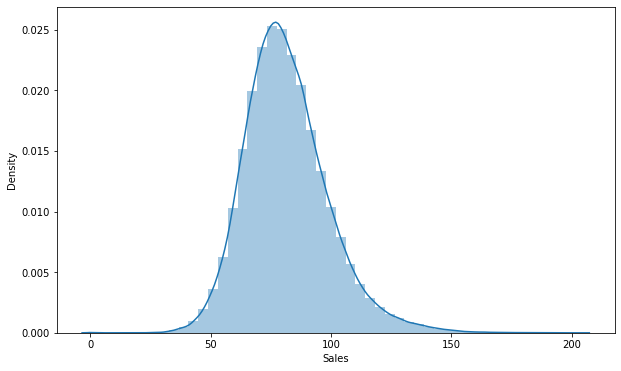

In [128]:
# Transform Your data
# Visualise Sales distribution after transformation
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(ros_store['Sales']),kde=True)

In [129]:
# Transforming Sales column
ros_store['Sales']=np.sqrt(ros_store['Sales'])
ros1_store['Sales']=np.sqrt(ros1_store['Sales'])

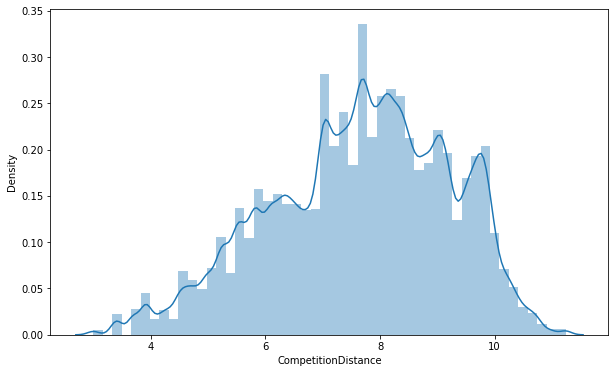

In [130]:
# Visualise Competition Distance distribution after transformation
plt.figure(figsize=(10,6))
sns.distplot(np.log(ros_store['CompetitionDistance']),kde=True)

In [131]:
# Transforming Competition Distance column
ros_store['CompetitionDistance']=np.log(ros_store['CompetitionDistance'])
ros1_store['CompetitionDistance']=np.log(ros1_store['CompetitionDistance'])

#### **Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?**

Some of the features needed to be transformed to make it gaussian(normal) distribution to have more accurate predictions and that are Sales and CompetitionDistance.

We have applied non-linear transformations like square root transformation on Sales feature and log transformation on CompetitionDistance feature to make them gaussian distribution.
CompetitionDistance feature is transformed to gaussian approximately.

### 6. Data Splitting

In [132]:
# Setting date and store as index
ros_store.set_index(['Date','Store'],inplace=True)
ros1_store.set_index(['Date','Store'],inplace=True)

# Sorting index following the time series
ros_store.sort_index(inplace=True)
ros1_store.sort_index(inplace=True)

In [133]:
# Slicing the most recent six weeks and creating train and test set
# Train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
ros_train = ros_store.loc[start_train:end_train]
ros1_train = ros1_store.loc[start_train:end_train]

# Test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
ros_test = ros_store.loc[start_test:end_test]
ros1_test = ros1_store.loc[start_test:end_test]

In [134]:
# X and y split for train and test 
X_train = ros_train.drop('Sales',axis=1)
y_train = ros_train[['Sales']]
X_test = ros_test.drop('Sales',axis=1)
y_test = ros_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (796477, 26)
The shape of y_train is: (796477, 1)
The shape of X_test is: (45729, 26)
The shape of y_test is: (45729, 1)


In [135]:
# First 5 rows 
X_train.head()

Promo  SchoolHoliday  CompetitionDistance  Promo2  Month  \
Date       Store                                                             
2013-01-01 85         0              1             7.533694       0      1   
           259        0              1             5.347108       0      1   
           262        0              1             7.073270       0      1   
           274        0              1             8.199739       1      1   
           335        0              1             4.499810       1      1   

                  DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  \
Date       Store                                                       
2013-01-01 85               0            1            0            0   
           259              0            1            0            0   
           262              0            1            0            0   
           274              0            1            0            0   
           335              0            1            0            0   

                  DayOfWeek_5  ...  Assortment_a  Assortment_b  Assortment_c  \
Date       Store               ...                                             
2013-01-01 85               0  ...             1             0             0   
           259              0  ...             0             1             0   
           262              0  ...             1             0             0   
           274              0  ...             0             1             0   
           335              0  ...             1             0             0   

                  StateHoliday_0  StateHoliday_a  StateHoliday_b  \
Date       Store                                                   
2013-01-01 85                  0               1               0   
           259                 0               1               0   
           262                 0               1               0   
           274                 0               1               0   
           335                 0               1               0   

                  StateHoliday_c  CompetitionOpen  Promo2Open  Promo2running  
Date       Store                                                              
2013-01-01 85                  0               15           0              0  
           259                 0                0           0              0  
           262                 0                0           0              0  
           274                 0                0           0              0  
           335                 0                0           0              0  

[5 rows x 26 columns]

In [136]:
# First 5 rows
y_train.head()

Sales
Date       Store            
2013-01-01 85      64.961527
           259     82.770768
           262    131.403957
           274     55.695601
           335     49.000000

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle.

However, we used recint six weeks as testing dataset and remaining as training dataset because of our problem statement given which is Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. 

### 7. Data Scaling

In [137]:
# Applying Standard Scaling technique to train and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = scaler.transform(X_test[list(X_test.columns)])

y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_test.columns)])

In [138]:
# First 5 rows 
X_train.head()

Promo  SchoolHoliday  CompetitionDistance    Promo2  \
Date       Store                                                           
2013-01-01 85    -0.893782       2.077997            -0.069794 -0.997063   
           259   -0.893782       2.077997            -1.468435 -0.997063   
           262   -0.893782       2.077997            -0.364302 -0.997063   
           274   -0.893782       2.077997             0.356239  1.002946   
           335   -0.893782       2.077997            -2.010406  1.002946   

                     Month  DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  \
Date       Store                                                    
2013-01-01 85    -1.407327    -0.440489     2.205574     -0.44933   
           259   -1.407327    -0.440489     2.205574     -0.44933   
           262   -1.407327    -0.440489     2.205574     -0.44933   
           274   -1.407327    -0.440489     2.205574     -0.44933   
           335   -1.407327    -0.440489     2.205574     -0.44933   

                  DayOfWeek_4  DayOfWeek_5  ...  Assortment_a  Assortment_b  \
Date       Store                            ...                               
2013-01-01 85       -0.434566    -0.442676  ...      0.948512     -0.099378   
           259      -0.434566    -0.442676  ...     -1.054283     10.062636   
           262      -0.434566    -0.442676  ...      0.948512     -0.099378   
           274      -0.434566    -0.442676  ...     -1.054283     10.062636   
           335      -0.434566    -0.442676  ...      0.948512     -0.099378   

                  Assortment_c  StateHoliday_0  StateHoliday_a  \
Date       Store                                                 
2013-01-01 85        -0.930069      -29.616624       33.935881   
           259       -0.930069      -29.616624       33.935881   
           262       -0.930069      -29.616624       33.935881   
           274       -0.930069      -29.616624       33.935881   
           335       -0.930069      -29.616624       33.935881   

                  StateHoliday_b  StateHoliday_c  CompetitionOpen  Promo2Open  \
Date       Store                                                                
2013-01-01 85          -0.013494       -0.009442        -0.452960   -0.677212   
           259         -0.013494       -0.009442        -0.688801   -0.677212   
           262         -0.013494       -0.009442        -0.688801   -0.677212   
           274         -0.013494       -0.009442        -0.688801   -0.677212   
           335         -0.013494       -0.009442        -0.688801   -0.677212   

                  Promo2running  
Date       Store                 
2013-01-01 85               0.0  
           259              0.0  
           262              0.0  
           274              0.0  
           335              0.0  

[5 rows x 26 columns]

In [139]:
# First 5 rows
y_train.head()

Sales
Date       Store          
2013-01-01 85    -0.946247
           259    0.072479
           262    2.854399
           274   -1.476277
           335   -1.859279

##### Which method have you used to scale you data and why?

**Standardization** 

Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.

The ultimate goal is to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.

It scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

I have used to Standardization i.e. StandardScaler()  to scale all the features of the dataset. As Sales and Competition Distance features are transformed to gaussian distribution, we are using standardization.

### 8. Dimesionality Reduction

As per my knowledge, for this dataset dimensionality reduction is not required.

For this dataset, there are not many features but some 10 to 15 features and most of which are important in predicting the sales. 

In large datasets, very often the variables are highly correlated. The very purpose of applying dimension reduction techniques like PCA is to identify those highly correlated variables or variables which are not related to the target variable and drop them out from further analysis.
Having highly correlated variables leads to overfitting and hence the accuracy of the model will suffer. 

So, it is good to do the dimensionality reduction wherever possible but here it is not required.

## ***7. ML Model Implementation***

### ML Model  1 - Implementing Linear Regression

In [140]:
# ML Model - 1 Implementation

# Fit the Algorithm
# Metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Fitting decision tree
ros_basic = LinearRegression()
ros_basic.fit(X_train,y_train)

# Predict on the model
y_pred_train1 = ros_basic.predict(X_train)
y_pred_test1 = ros_basic.predict(X_test)


In [ ]:
# Calculate metrics and print the results for train and test set
  
# Mean Squared Error or MSE
MSE_train1 = round(mean_squared_error(y_train,y_pred_train1),6)
MSE_test1 = round(mean_squared_error(y_test,y_pred_test1),6)

# Root Mean Squared Error or RMSE
RMSE_train1 = round(mean_squared_error(y_train,y_pred_train1,squared=False),6)
RMSE_test1 = round(mean_squared_error(y_test,y_pred_test1,squared=False),6)

# R2
R2_train1 = round(r2_score(y_train, y_pred_train1),6)
R2_test1 = round(r2_score(y_test, y_pred_test1),6)

# Adjusted R2
Adj_r2_train1 = round(1 - (1-r2_score(y_train, y_pred_train1)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
Adj_r2_test1 = round(1 - (1-r2_score(y_test, y_pred_test1)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

# Printing train results
print(f'The Mean Squared Error for the training data is {MSE_train1}')
print(f'The Root Mean Squared Error for the training data is {RMSE_train1}')
print(f'The R^2 for the training data is {R2_train1}')
print(f'The Adjusted R^2 for the training data is {Adj_r2_train1}\n')

# Printing test results
print(f'The Mean Squared Error for the testing data is {MSE_test1}')
print(f'The Root Mean Squared Error for the testing data is {RMSE_test1}')
print(f'The R^2 for the testing data is {R2_test1}')
print(f'The Adjusted R^2 for the testing data is {Adj_r2_test1}')

The Mean Squared Error for the training data is 0.757272
The Root Mean Squared Error for the training data is 0.870214
The R^2 for the training data is 0.242728
The Adjusted R^2 for the training data is 0.242703

The Mean Squared Error for the testing data is 0.695205
The Root Mean Squared Error for the testing data is 0.83379
The R^2 for the testing data is 0.282428
The Adjusted R^2 for the testing data is 0.28202


Text(0, 0.5, 'Total Sales and Predicted Sales')

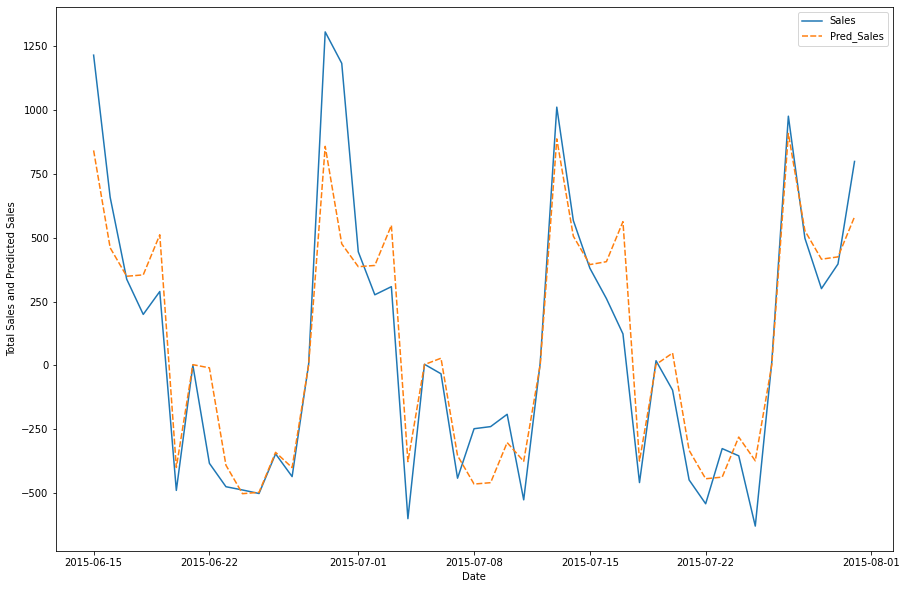

In [ ]:
# Plotting the test results
a = y_test.copy()
a['Pred_Sales'] = y_pred_test1
df_plot1 = a.reset_index(level=['Date'])
plot1 = df_plot1.groupby('Date')['Sales','Pred_Sales'].sum()

plt.rcParams['figure.figsize'] = (15, 10)
sns.lineplot(data=plot1)
plt.ylabel("Total Sales and Predicted Sales")

Text(0, 0.5, 'Residuals')

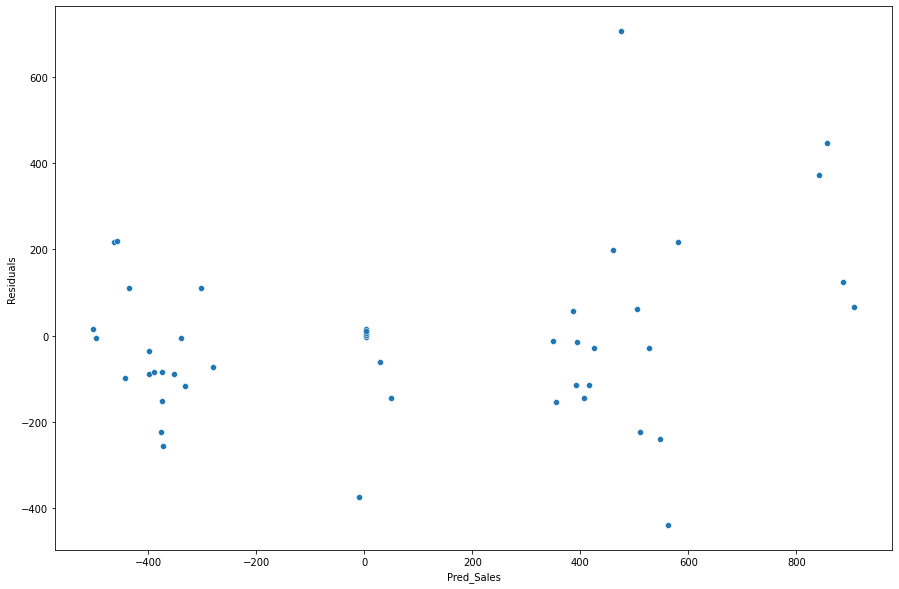

In [ ]:
# Checking the Homoscedasticity assumption 
plt.rcParams['figure.figsize'] = (15, 10)
sns.scatterplot(x=plot1['Pred_Sales'],y=plot1['Sales']-plot1['Pred_Sales'])
plt.ylabel("Residuals")

#### Homoscedasticity

An important assumption of linear regression is homoscedasticity which refers to equal variance in residuals. Unequal variance in residuals, on the other hand, cause heteroscedastic dispersion. In regression analysis, the term ‘residual’ refers to the difference between observed and predicted data.

Heteroscedastic dispersion is caused due to the following 2 main reasons:

*   It occurs in data sets with large ranges(outliers) and oscillates between the largest and smallest values.

*   An improper selection of regression models can cause it.

As we have determined while dealing with outliers that outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features. 

From the visualization of sales with different features, I came to know that there is seasonality involved and no linear relationship is possible to fit. From the above residual vs fitted plot, u-shape curve indicates that there is non-linearity in the model which can't be explained by the linear regression. For these kinds of datasets, tree based machine learning algorithms can be used which are robust to outlier effect.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used Linear Regression to predict the  daily sales and results are as follows:

**For the training data**, 

Mean Squared Error is 0.7124 

Root Mean Squared Error is 0.8440

R^2 value is 0.264614

Adjusted R^2 value is 0.264276


**For the testing data**, 

Mean Squared Error is 0.7124 

Root Mean Squared Error is 0.8440

R^2 value is 0.264614

Adjusted R^2 value is 0.264276

I have not got good results, so improving by using hyperparameter tuning.

In [ ]:
# Visualizing evaluation Metric Score chart
# Columns needed to compare metrics
model_name='Linear Regression'
comparison_columns = ['Model_Name', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' , 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']
metric_lin_reg = [model_name, MSE_train1, RMSE_train1, R2_train1, Adj_r2_train1, MSE_test1, RMSE_test1, R2_test1, Adj_r2_test1]
comparison_dict = dict(zip(comparison_columns,metric_lin_reg))
comparison_df=pd.DataFrame()
comparison_df=comparison_df.append(comparison_dict,ignore_index=True)
comparison_df

,Model_Name,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.757272,0.870214,0.242728,0.242703,0.695205,0.83379,0.282428,0.28202


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the  Algortithm
# Hyperparameter tuning using GridSearch CV
# Used the Ridge Regression as Linear Regression does not have hyperparameters.
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,150]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -0.764393114216396


In [ ]:
# Calculate metrics and print the results for train and test set
# Predict on the model
y_pred_train1_hyp = ridge_regressor.predict(X_train)
y_pred_test1_hyp = ridge_regressor.predict(X_test)

# Mean Squared Error or MSE
MSE_train1_hyp = round(mean_squared_error(y_train,y_pred_train1_hyp),6)
MSE_test1_hyp = round(mean_squared_error(y_test,y_pred_test1_hyp),6)

# Root Mean Squared Error or RMSE
RMSE_train1_hyp = round(mean_squared_error(y_train,y_pred_train1_hyp,squared=False),6)
RMSE_test1_hyp= round(mean_squared_error(y_test,y_pred_test1_hyp,squared=False),6)

# R2
R2_train1_hyp = round(r2_score(y_train, y_pred_train1_hyp),6)
R2_test1_hyp = round(r2_score(y_test, y_pred_test1_hyp),6)

# Adjusted R2
Adj_r2_train1_hyp = round(1 - (1-r2_score(y_train, y_pred_train1_hyp)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
Adj_r2_test1_hyp = round(1 - (1-r2_score(y_test, y_pred_test1_hyp)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)

#printing train results
print(f'The Mean Squared Error for the training data is {MSE_train1_hyp}')
print(f'The Root Mean Squared Error for the training data is {RMSE_train1_hyp}')
print(f'The R^2 for the training data is {R2_train1_hyp}')
print(f'The Adjusted R^2 for the training data is {Adj_r2_train1_hyp}\n')

#printing test results
print(f'The Mean Squared Error for the testing data is {MSE_test1_hyp}')
print(f'The Root Mean Squared Error for the testing data is {RMSE_test1_hyp}')
print(f'The R^2 for the testing data is {R2_test1_hyp}')
print(f'The Adjusted R^2 for the testing data is {Adj_r2_test1_hyp}')

The Mean Squared Error for the training data is 0.757193
The Root Mean Squared Error for the training data is 0.870168
The R^2 for the training data is 0.242807
The Adjusted R^2 for the training data is 0.242782

The Mean Squared Error for the testing data is 0.694474
The Root Mean Squared Error for the testing data is 0.833351
The R^2 for the testing data is 0.283183
The Adjusted R^2 for the testing data is 0.282775


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have used the Ridge Regression as Linear Regression does not have any hyperparameters. Also, I don't want to remove any features so, not using Lasso Regression.

For the training data,

Mean Squared Error is 0.7124 

Root Mean Squared Error is 0.8440

R^2 value is 0.264617

Adjusted R^2 value is 0.264279



For the testing data, 

Mean Squared Error is 0.7124 

Root Mean Squared Error is 0.8440

R^2 value is 0.264617

Adjusted R^2 value is 0.264279

I got no significant improvement in all the evaluation metrics using hyperparameter tuning.

In [ ]:
# improvement % of ridge regression vs simple decision tree
improvement_l = ((R2_test1_hyp - R2_test1)/R2_test1)*100
print('Model Performance')
print(f'Improvement of {round(improvement_l,3)} % was seen in Ridge Regression against Simple Linear Regression.')

Model Performance
Improvement of 0.267 % was seen in Ridge Regression against Simple Linear Regression.


In [ ]:
# Updating Evaluation Metric Score chart
model_name='Ridge Regression(GridSearchCV)'
comparison_columns = ['Model_Name', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' , 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']
metric_ridge_reg = [model_name, MSE_train1_hyp, RMSE_train1_hyp, R2_train1_hyp, Adj_r2_train1_hyp, MSE_test1_hyp, RMSE_test1_hyp, R2_test1_hyp, Adj_r2_test1_hyp]
comparison_dict1 = dict(zip(comparison_columns,metric_ridge_reg))
comparison_df=comparison_df.append(comparison_dict1,ignore_index=True)
comparison_df

,Model_Name,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.757272,0.870214,0.242728,0.242703,0.695205,0.833790,0.282428,0.282020
1,Ridge Regression(GridSearchCV),0.757193,0.870168,0.242807,0.242782,0.694474,0.833351,0.283183,0.282775


#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**R Square/Adjusted R Square**

R Square measures how much variability in dependent variable can be explained by the model. R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform. So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. Basically R2 squared calculates how must regression line is better than a mean line.

Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

R-squared is the percentage of the dependent variable variation that a linear model explains.

R-squared is always between 0% and 100%:

* 0% represents a model that does not explain any of the variations in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
* 100% represents a model that explains all of the variations in the response variable around its mean.

Usually, the larger the R2, the better the regression model fits your observations.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

**Mean Squared Error/Root Mean Squared Error**

MSE is defined as the Mean of Square of Errors(Actual-Predicted values).
While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit.Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

### ML Model  2 - Implementing Decision Tree Regressor 

In [141]:
# Taking ros1_store having Year column

# X and y split for train and test 
X1_train = ros1_train.drop('Sales',axis=1)
y1_train = ros1_train[['Sales']]
X1_test = ros1_test.drop('Sales',axis=1)
y1_test = ros1_test[['Sales']]
print(f'The shape of X_train is: {X1_train.shape}')
print(f'The shape of y_train is: {y1_train.shape}')
print(f'The shape of X_test is: {X1_test.shape}')
print(f'The shape of y_test is: {y1_test.shape}')

The shape of X_train is: (796477, 27)
The shape of y_train is: (796477, 1)
The shape of X_test is: (45729, 27)
The shape of y_test is: (45729, 1)


In [142]:
# Applying Standard Scaling technique to ros1_store
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train[list(X1_train.columns)] = scaler.fit_transform(X1_train[list(X1_train.columns)])
X1_test[list(X1_test.columns)] = scaler.transform(X1_test[list(X1_test.columns)])


y1_train[list(y1_train.columns)] = scaler.fit_transform(y1_train[list(y1_train.columns)])
y1_test[list(y1_test.columns)] = scaler.transform(y1_test[list(y1_train.columns)])

In [ ]:
# First 5 rows
X1_test.head()

Promo  SchoolHoliday  CompetitionDistance    Promo2  \
Date       Store                                                           
2015-06-15 1      1.029002      -0.639699            -0.319865 -1.023522   
           2      1.029002      -0.639699            -0.834632  0.977018   
           3      1.029002      -0.639699             1.228213  0.977018   
           4      1.029002      -0.639699            -0.780605 -1.023522   
           5      1.029002      -0.639699             1.710054 -1.023522   

                  Year     Month  WeekOfYear  DayOfWeek_1  DayOfWeek_2  \
Date       Store                                                         
2015-06-15 1       0.0 -1.388243   -1.486571     2.209422    -0.452607   
           2       0.0 -1.388243   -1.486571     2.209422    -0.452607   
           3       0.0 -1.388243   -1.486571     2.209422    -0.452607   
           4       0.0 -1.388243   -1.486571     2.209422    -0.452607   
           5       0.0 -1.388243   -1.486571     2.209422    -0.452607   

                  DayOfWeek_3  ...  Assortment_a  Assortment_b  Assortment_c  \
Date       Store               ...                                             
2015-06-15 1        -0.452607  ...      0.941671     -0.096626     -0.924327   
           2        -0.452607  ...      0.941671     -0.096626     -0.924327   
           3        -0.452607  ...      0.941671     -0.096626     -0.924327   
           4        -0.452607  ...     -1.061943     -0.096626      1.081869   
           5        -0.452607  ...      0.941671     -0.096626     -0.924327   

                  StateHoliday_0  StateHoliday_a  StateHoliday_b  \
Date       Store                                                   
2015-06-15 1                 0.0             0.0             0.0   
           2                 0.0             0.0             0.0   
           3                 0.0             0.0             0.0   
           4                 0.0             0.0             0.0   
           5                 0.0             0.0             0.0   

                  StateHoliday_c  CompetitionOpen  Promo2Open  Promo2running  
Date       Store                                                              
2015-06-15 1                 0.0         0.341564   -0.832721            0.0  
           2                 0.0         0.492586    1.736699            0.0  
           3                 0.0         0.658711    1.239392            0.0  
           4                 0.0         0.160337   -0.832721            0.0  
           5                 0.0        -0.851512   -0.832721            0.0  

[5 rows x 28 columns]

In [ ]:
# ML Model - 2 Implementation

# Fit the Algorithm
ros_dec_tree = DecisionTreeRegressor(random_state=24)
ros_dec_tree.fit(X1_train,y1_train)

# Predict on the model
y_pred_train2 = ros_dec_tree.predict(X1_train)
y_pred_test2 = ros_dec_tree.predict(X1_test)


In [ ]:
# Calculate metrics and print the results for train and test set
  
#Mean Squared Error or MSE
MSE_train2 = round(mean_squared_error(y1_train,y_pred_train2),6)
MSE_test2 = round(mean_squared_error(y1_test,y_pred_test2),6)

#Root Mean Squared Error or RMSE
RMSE_train2 = round(mean_squared_error(y1_train,y_pred_train2,squared=False),6)
RMSE_test2 = round(mean_squared_error(y1_test,y_pred_test2,squared=False),6)

#R2
R2_train2 = round(r2_score(y1_train, y_pred_train2),6)
R2_test2 = round(r2_score(y1_test, y_pred_test2),6)

#Adjusted R2
Adj_r2_train2 = round(1 - (1-r2_score(y1_train, y_pred_train2)) * (len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1),6)
Adj_r2_test2 = round(1 - (1-r2_score(y1_test, y_pred_test2)) * (len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1),6)

# Printing train results
print(f'The Mean Squared Error for the training data is {MSE_train2}')
print(f'The Root Mean Squared Error for the training data is {RMSE_train2}')
print(f'The R^2 for the training data is {R2_train2}')
print(f'The Adjusted R^2 for the training data is {Adj_r2_train2}\n')

# Printing test results
print(f'The Mean Squared Error for the testing data is {MSE_test2}')
print(f'The Root Mean Squared Error for the testing data is {RMSE_test2}')
print(f'The R^2 for the testing data is {R2_test2}')
print(f'The Adjusted R^2 for the testing data is {Adj_r2_test2}')

The Mean Squared Error for the training data is 0.039118
The Root Mean Squared Error for the training data is 0.197784
The R^2 for the training data is 0.960882
The Adjusted R^2 for the training data is 0.96088

The Mean Squared Error for the testing data is 0.269121
The Root Mean Squared Error for the testing data is 0.518769
The R^2 for the testing data is 0.72222
The Adjusted R^2 for the testing data is 0.722056


Text(0, 0.5, 'Total Sales and Predicted Sales')

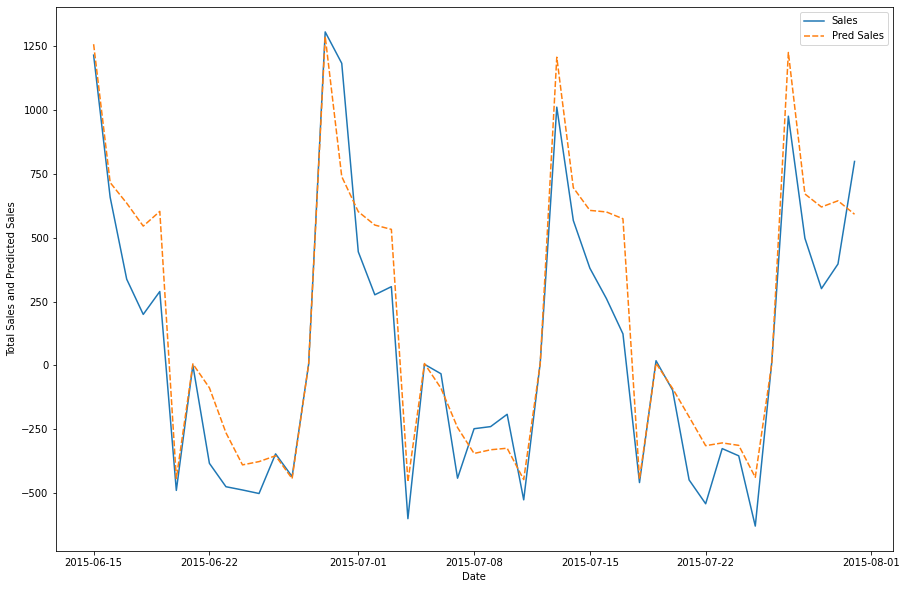

In [ ]:
# Plotting the test results
b = y_test.copy()
b['Pred Sales'] = y_pred_test2
df_plot2 = b.reset_index(level=['Date'])
plot2 = df_plot2.groupby('Date')['Sales','Pred Sales'].sum()

plt.rcParams['figure.figsize'] = (15, 10)
sns.lineplot(data = plot2)
plt.ylabel("Total Sales and Predicted Sales")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

As my dataset has outliers and due to multicollinearity an important feature i.e Year was dropped, Linear Regression was unable to give good results.

I used Decision Tree Regressor which is insensitive to outliers and immune to multicollinearity, so included the feature 'Year'  which is important in predicting the daily sales.

I found following results:

For the training data,

Mean Squared Error is 0.2718

Root Mean Squared Error is 0.5213

R^2 value is 0.719454

Adjusted R^2 value is 0.719325



For the testing data,

Mean Squared Error is 0.2718

Root Mean Squared Error is 0.5213

R^2 value is 0.719454

Adjusted R^2 value is 0.719325

I got significant improvement in evaluation metrics as compared to Linear Regression but we can see that overfitting has happened.

Now, trying to remove overfitting and improving the results by using hyperparameter tuning.

In [ ]:
# Visualizing evaluation Metric Score chart
# Updating Evaluation Metric Score chart
model_name='Decision Tree Regressor'
comparison_columns = ['Model_Name', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' , 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']
metric_dec_tree = [model_name, MSE_train2, RMSE_train2, R2_train2, Adj_r2_train2, MSE_test2, RMSE_test2, R2_test2, Adj_r2_test2]
comparison_dict2 = dict(zip(comparison_columns,metric_dec_tree))
comparison_df=comparison_df.append(comparison_dict2,ignore_index=True)
comparison_df


,Model_Name,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.757272,0.870214,0.242728,0.242703,0.695205,0.833790,0.282428,0.282020
1,Ridge Regression(GridSearchCV),0.757193,0.870168,0.242807,0.242782,0.694474,0.833351,0.283183,0.282775
2,Decision Tree Regressor,0.039118,0.197784,0.960882,0.960880,0.269121,0.518769,0.722220,0.722056


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
Dec_tree = DecisionTreeRegressor(random_state=24)

# Maximum depth of trees
max_depth = [90,100,None]

# Minimum number of samples required to split a node
min_samples_split = [15,20,25]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5,10,15]

# Hyperparameter Grid
param_dict = {'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

dec_tree_regressor = GridSearchCV(Dec_tree, param_dict, cv=3)
dec_tree_regressor.fit(X1_train,y1_train)

print("The best values of max_depth, min_samples_leaf,min_samples_split are found out to be :" ,dec_tree_regressor.best_params_)



In [ ]:
# Calculate metrics and print the results for train and test set
# Predict on the model

y_pred_train2_hyp = dec_tree_regressor.predict(X1_train)
y_pred_test2_hyp = dec_tree_regressor.predict(X1_test)

#Mean Squared Error or MSE
MSE_train2_hyp = round(mean_squared_error(y1_train,y_pred_train2_hyp),6)
MSE_test2_hyp = round(mean_squared_error(y1_test,y_pred_test2_hyp),6)

#Root Mean Squared Error or RMSE
RMSE_train2_hyp = round(mean_squared_error(y1_train,y_pred_train2_hyp,squared=False),6)
RMSE_test2_hyp= round(mean_squared_error(y1_test,y_pred_test2_hyp,squared=False),6)

#R2
R2_train2_hyp = round(r2_score(y1_train, y_pred_train2_hyp),6)
R2_test2_hyp = round(r2_score(y1_test, y_pred_test2_hyp),6)

#Adjusted R2
Adj_r2_train2_hyp = round(1 - (1-r2_score(y1_train, y_pred_train2_hyp)) * (len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1),6)
Adj_r2_test2_hyp = round(1 - (1-r2_score(y1_test, y_pred_test2_hyp)) * (len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1),6)

# printing train results
print(f'The Mean Squared Error for the training data is {MSE_train2_hyp}')
print(f'The Root Mean Squared Error for the training data is {RMSE_train2_hyp}')
print(f'The R^2 for the training data is {R2_train2_hyp}')
print(f'The Adjusted R^2 for the training data is {Adj_r2_train2_hyp}\n')

# printing test results
print(f'The Mean Squared Error for the testing data is {MSE_test2_hyp}')
print(f'The Root Mean Squared Error for the testing data is {RMSE_test2_hyp}')
print(f'The R^2 for the testing data is {R2_test2_hyp}')
print(f'The Adjusted R^2 for the testing data is {Adj_r2_test2_hyp}')

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have seen improvement in the model performance and results are shown as follows:

For the training data,

Mean Squared Error is 0.2317

Root Mean Squared Error is 0.4814

R^2 value is 0.760787

Adjusted R^2 value is 0.760677

For the testing data,

Mean Squared Error is 0.2317

Root Mean Squared Error is 0.4814

R^2 value is 0.760787

Adjusted R^2 value is 0.760677

In [ ]:
# improvement % of decision tree hyperparameter tuned  vs simple decision tree
improvement_d = ((R2_test2_hyp - R2_test2)/R2_test2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_d,3)} % was seen in Decision Tree Hyperparameter Tuned against Simple Decision Tree.')

In [ ]:
# Visualizing evaluation Metric Score chart
# Updating Evaluation Metric Score chart
model_name='Decision Tree Regressor(GridSearchCV)'
comparison_columns = ['Model_Name', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' , 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']
metric_dec_tree_hyp = [model_name, MSE_train2_hyp, RMSE_train2_hyp, R2_train2_hyp, Adj_r2_train2_hyp, MSE_test2_hyp, RMSE_test2_hyp, R2_test2_hyp, Adj_r2_test2_hyp]
comparison_dict3 = dict(zip(comparison_columns,metric_dec_tree_hyp))
comparison_df=comparison_df.append(comparison_dict3,ignore_index=True)
comparison_df

,Model_Name,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.757272,0.870214,0.242728,0.242703,0.695205,0.833790,0.282428,0.282020
1,Ridge Regression(GridSearchCV),0.757193,0.870168,0.242807,0.242782,0.694474,0.833351,0.283183,0.282775
2,Decision Tree Regressor,0.039118,0.197784,0.960882,0.960880,0.269121,0.518769,0.722220,0.722056
3,Decision Tree Regressor(GridSearchCV),0.155557,0.394408,0.844443,0.844437,0.256627,0.506584,0.735117,0.734960


#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**R Square/Adjusted R Square**

R Square measures how much variability in dependent variable can be explained by the model. R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform. So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. Basically R2 squared calculates how must regression line is better than a mean line.

Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

R-squared is the percentage of the dependent variable variation that a linear model explains.

R-squared is always between 0% and 100%:

* 0% represents a model that does not explain any of the variations in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
* 100% represents a model that explains all of the variations in the response variable around its mean.

Usually, the larger the R2, the better the regression model fits your observations.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

**Mean Squared Error/Root Mean Squared Error**

MSE is defined as the Mean of Square of Errors(Actual-Predicted values).
While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error(MSE) is an absolute measure of the goodness for the fit.Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

### ML Model  3 - Implementing Random Forest Regressor

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm
rand_forest=RandomForestRegressor(random_state=24)
rand_forest.fit(X1_train,y1_train)

# Predict on the model
y_pred_train3 = rand_forest.predict(X1_train)
y_pred_test3 = rand_forest.predict(X1_test)


In [ ]:
# Calculate metrics and print the results for train and test set
  
# Mean Squared Error or MSE
MSE_train3 = round(mean_squared_error(y1_train,y_pred_train3),6)
MSE_test3 = round(mean_squared_error(y1_test,y_pred_test3),6)

# Root Mean Squared Error or RMSE
RMSE_train3 = round(mean_squared_error(y1_train,y_pred_train3,squared=False),6)
RMSE_test3 = round(mean_squared_error(y1_test,y_pred_test3,squared=False),6)

# R2
R2_train3 = round(r2_score(y1_train, y_pred_train3),6)
R2_test3 = round(r2_score(y1_test, y_pred_test3),6)

# Adjusted R2
Adj_r2_train3 = round(1 - (1-r2_score(y1_train, y_pred_train3)) * (len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1),6)
Adj_r2_test3 = round(1 - (1-r2_score(y1_test, y_pred_test3)) * (len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1),6)

# printing train results
print(f'The Mean Squared Error for the training data is {MSE_train3}')
print(f'The Root Mean Squared Error for the training data is {RMSE_train3}')
print(f'The R^2 for the training data is {R2_train3}')
print(f'The Adjusted R^2 for the training data is {Adj_r2_train3}\n')

# printing test results
print(f'The Mean Squared Error for the testing data is {MSE_test3}')
print(f'The Root Mean Squared Error for the testing data is {RMSE_test3}')
print(f'The R^2 for the testing data is {R2_test3}')
print(f'The Adjusted R^2 for the testing data is {Adj_r2_test3}')

The Mean Squared Error for the training data is 0.044902
The Root Mean Squared Error for the training data is 0.2119
The R^2 for the training data is 0.955098
The Adjusted R^2 for the training data is 0.955097

The Mean Squared Error for the testing data is 0.163506
The Root Mean Squared Error for the testing data is 0.404359
The R^2 for the testing data is 0.831233
The Adjusted R^2 for the testing data is 0.831134


Text(0, 0.5, 'Total Sales and Predicted Sales')

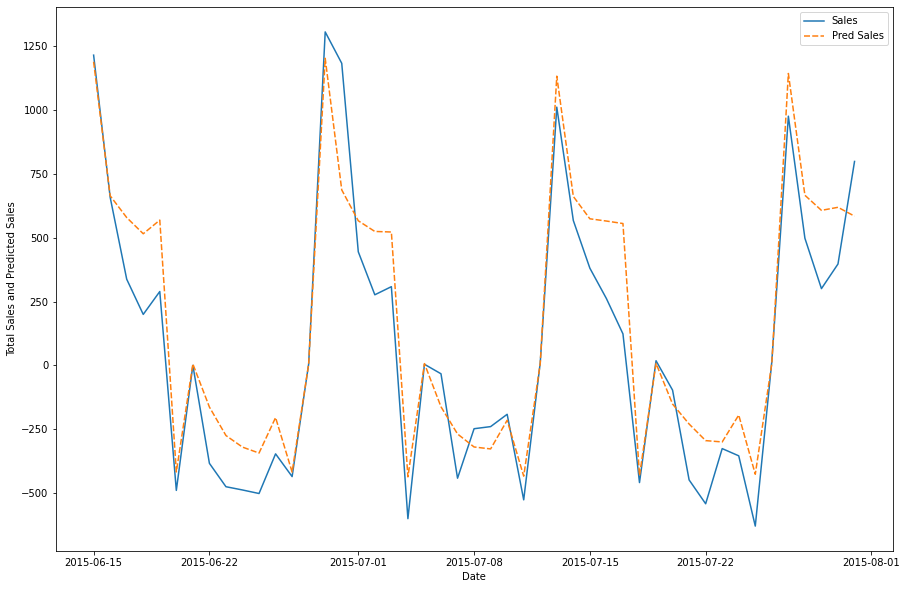

In [ ]:
# Plotting the test results
c = y_test.copy()
c['Pred Sales'] = y_pred_test3
df_plot3 = c.reset_index(level=['Date'])
plot3 = df_plot3.groupby('Date')['Sales','Pred Sales'].sum()

plt.rcParams['figure.figsize'] = (15, 10)
sns.lineplot(data = plot3)
plt.ylabel("Total Sales and Predicted Sales")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used Random Forest Regressor and it is a bagging technique of ensembling of decision trees which is an improvement of DecisionTree as it reduces overfitting and variance as I want more accurate predictions in order to use it for deployment purpose.

I got following results:

For the training data,

Mean Squared Error is 0.16392

Root Mean Squared Error is 0.40487

R^2 value is 0.830806

Adjusted R^2 value is 0.830729

For the testing data,

Mean Squared Error is 0.16392

Root Mean Squared Error is 0.40487

R^2 value is 0.830806

Adjusted R^2 value is 0.830729

I got quite good results and now improving these by hyperparameter tuning. 

In [ ]:
# Visualizing evaluation Metric Score chart
# Updating Evaluation Metric Score chart
model_name='Random Forest Regressor'
comparison_columns = ['Model_Name', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' , 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']
metric_rand_forest = [model_name, MSE_train3, RMSE_train3, R2_train3, Adj_r2_train3, MSE_test3, RMSE_test3, R2_test3, Adj_r2_test3]
comparison_dict4 = dict(zip(comparison_columns,metric_rand_forest))
comparison_df=comparison_df.append(comparison_dict4,ignore_index=True)
comparison_df

,Model_Name,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.757272,0.870214,0.242728,0.242703,0.695205,0.833790,0.282428,0.282020
1,Ridge Regression(GridSearchCV),0.757193,0.870168,0.242807,0.242782,0.694474,0.833351,0.283183,0.282775
2,Decision Tree Regressor,0.039118,0.197784,0.960882,0.960880,0.269121,0.518769,0.722220,0.722056
3,Decision Tree Regressor(GridSearchCV),0.155557,0.394408,0.844443,0.844437,0.256627,0.506584,0.735117,0.734960
4,Random Forest Regressor,0.044902,0.211900,0.955098,0.955097,0.163506,0.404359,0.831233,0.831134


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
rd_forest=RandomForestRegressor(random_state=24)
param_dict_ = {'max_depth' : [45,60],
                'min_samples_leaf': [30,35],
                'min_samples_split' : [90,100],
                'n_estimators': [130,150]}

rf_grid = GridSearchCV(rd_forest,param_dict_ , cv = 3)

# Fitting
rf_grid.fit(X1_train,y1_train)

print("The best values of hyperparameters are found out to be :" ,rf_grid.best_params_)


 




The best values of hyperparameters are found out to be : {'max_depth': 45, 'min_samples_leaf': 30, 'min_samples_split': 90, 'n_estimators': 150}


In [ ]:
# Calculate metrics and print the results for train and test set
# Predict on the model
y_pred_train3_hyp = rf_grid.predict(X1_train)
y_pred_test3_hyp = rf_grid.predict(X1_test)

# Mean Squared Error or MSE
MSE_train3_hyp = round(mean_squared_error(y1_train,y_pred_train3_hyp),6)
MSE_test3_hyp = round(mean_squared_error(y1_test,y_pred_test3_hyp),6)

# Root Mean Squared Error or RMSE
RMSE_train3_hyp = round(mean_squared_error(y1_train,y_pred_train3_hyp,squared=False),6)
RMSE_test3_hyp= round(mean_squared_error(y1_test,y_pred_test3_hyp,squared=False),6)

# R2
R2_train3_hyp = round(r2_score(y1_train, y_pred_train3_hyp),6)
R2_test3_hyp = round(r2_score(y1_test, y_pred_test3_hyp),6)

# Adjusted R2
Adj_r2_train3_hyp = round(1 - (1-r2_score(y1_train, y_pred_train3_hyp)) * (len(y1_train)-1)/(len(y1_train)-X1_train.shape[1]-1),6)
Adj_r2_test3_hyp = round(1 - (1-r2_score(y1_test, y_pred_test3_hyp)) * (len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1),6)

# printing train results
print(f'The Mean Squared Error for the training data is {MSE_train3_hyp}')
print(f'The Root Mean Squared Error for the training data is {RMSE_train3_hyp}')
print(f'The R^2 for the training data is {R2_train3_hyp}')
print(f'The Adjusted R^2 for the training data is {Adj_r2_train3_hyp}\n')

# printing test results
print(f'The Mean Squared Error for the testing data is {MSE_test3_hyp}')
print(f'The Root Mean Squared Error for the testing data is {RMSE_test3_hyp}')
print(f'The R^2 for the testing data is {R2_test3_hyp}')
print(f'The Adjusted R^2 for the testing data is {Adj_r2_test3_hyp}')

The Mean Squared Error for the training data is 0.154813
The Root Mean Squared Error for the training data is 0.393463
The R^2 for the training data is 0.845187
The Adjusted R^2 for the training data is 0.845181

The Mean Squared Error for the testing data is 0.204175
The Root Mean Squared Error for the testing data is 0.451858
The R^2 for the testing data is 0.789256
The Adjusted R^2 for the testing data is 0.789131


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have seen improvement in the model performance and results are shown as follows:

For the training data,

Mean Squared Error is 0.2317

Root Mean Squared Error is 0.4814

R^2 value is 0.760787

Adjusted R^2 value is 0.760677

For the testing data,

Mean Squared Error is 0.2317

Root Mean Squared Error is 0.4814

R^2 value is 0.760787

Adjusted R^2 value is 0.760677

In [ ]:
# improvement % of random forest tuned vs simple random forest
improvement_r = ((R2_test3_hyp - R2_test3)/R2_test3)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Hyperparameter Tuned against Simple Random Forest.')

NameError: ignored

In [ ]:
# Visualizing evaluation Metric Score chart
# Updating Evaluation Metric Score chart
model_name='Random Forest Regressor(GridSearchCV)'
comparison_columns = ['Model_Name', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' , 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']
metric_rd_forest_hyp = [model_name, MSE_train3_hyp, RMSE_train3_hyp, R2_train3_hyp, Adj_r2_train3_hyp, MSE_test3_hyp, RMSE_test3_hyp, R2_test3_hyp, Adj_r2_test3_hyp]
comparison_dict5 = dict(zip(comparison_columns,metric_rd_forest_hyp))
comparison_df=comparison_df.append(comparison_dict5,ignore_index=True)
comparison_df

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**R Square/Adjusted R Square**

R Square measures how much variability in dependent variable can be explained by the model. R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform. So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. Basically R2 squared calculates how must regression line is better than a mean line.

Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

R-squared is the percentage of the dependent variable variation that a linear model explains.

R-squared is always between 0% and 100%:

* 0% represents a model that does not explain any of the variations in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
* 100% represents a model that explains all of the variations in the response variable around its mean.

Usually, the larger the R2, the better the regression model fits your observations.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

**Mean Squared Error/Root Mean Squared Error**

MSE is defined as the Mean of Square of Errors(Actual-Predicted values).
While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit.Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

## 1. Which Evaluation metrics did you consider for a positive business impact and why?

**R Square & Adjusted R Square**

R Square measures how much variability in dependent variable can be explained by the model. R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform. So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. Basically R2 squared calculates how must regression line is better than a mean line.

Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

R-squared is the percentage of the dependent variable variation that a linear model explains.

R-squared is always between 0% and 100%:

* 0% represents a model that does not explain any of the variations in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
* 100% represents a model that explains all of the variations in the response variable around its mean.

Usually, the larger the R2, the better the regression model fits your observations.

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

**Mean Squared Error & Root Mean Squared Error**

While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit.Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

**Evaluation Metrics Considered**

R Square & Adjusted R Square are better be used to explain the model to other people because you can explain the number as a percentage of the output variability means the proportion of variance in the dependent variable that can be explained by the independent variables.

**R2 = Variability explained by the model/ Total Variance in the target variable**

For example, an R-squared of 80% reveals that 80% of the variability observed in the target variable is explained by the regression model.
Higher the R squared value, higher the variablility of Sales explained by our model. It can be easily interpreted and has a direct impact on the prediction of sales which is our goal.So, R-squared and Adjusted R-squared values are considered for a positive business impact.

While, MSE & RMSE are better be used to compare performance between different regression models as they are absolute measures of the goodness of the fit.



## 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have used Random Forest Regressor which is Hyperparameter tuned by GridSearch Optimization technique and chosen the same from the above created models. Random Forest Regressor is used as our data contains noise i.e. outliers and overcoming the problem of overfitting and reducing the variance to much extent.

Mean Squared Error, Root Mean Squared Error and R Square, Adjusted R Square value for both Decision Tree and Random Forest Hyperparameter tuned models for the testing data is compared and shown below:

**Hyperparameter Tuned Decision Tree:**

Mean Squared Error is 

Root Mean Squared Error is 

R^2 value is 

Adjusted R^2 value is

### **Hyperparameter Tuned Random Forest:**

Mean Squared Error is 

Root Mean Squared Error is 

R^2 value is 

Adjusted R^2 value is 

## 3. Explain the model which you have used and the feature importance using any model explainability tool?

### Model Explainability using LIME

In [161]:
# Installing lime
%pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 4.6 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=8224c54ff28910ac117a8cf9d6b2701401dd1cfa81fbaedfadd3d9bf21073362
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [162]:
# importing lime 
import lime
import lime.lime_tabular

In [163]:
# LIME has one explainer for all the models
# Creating explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X1_train.values, feature_names=X1_train.columns.values.tolist(),
                                                  class_names=['Sales'], verbose=True, mode='regression')

In [164]:
# Choose the 2nd instance and use it to predict the results
j = 2
exp = explainer.explain_instance(X1_test.values[j], rand_forest.predict,num_features=6)

NameError: ignored

In [165]:
# Actual value of 2nd instance
y1_test.values[2]

array([1.28738529])

In [166]:
# Values of 2nd instance of particular columns
Ro_store.loc[2,['Promo','StoreType','DayOfWeek','Assortment','Promo2','Sales']]

Promo            1
StoreType        a
DayOfWeek        5
Assortment       a
Promo2           1
Sales         8314
Name: 2, dtype: object

In [ ]:
# Show the predictions
plt.rcParams['figure.figsize'] = (12, 8)
exp.show_in_notebook(show_table=True)

Here’s plenty of information that LIME outputs give. Let’s go step by step and interpret what it’s trying to convey.

First, we see three values just above the visualizations:

**Right**:  This denotes the prediction given by our prediction model(random forest regressor) for the given test vector.

**Prediction_local**:  This denotes the value outputted by a linear model trained on the perturbed samples(obtained by sampling around the test vector following a normal distribution) and using only the top k features outputted by LIME.

**Intercept:** The intercept is the constant part of the prediction given by the above linear model’s prediction for the given test vector.


Coming to the visualizations, we can see the colors blue and orange, depicting negative and positive associations with the sales respectively.

We can conclude from the visualization (in the centre) about the sales for the 2nd instance of the test data(depicted by a orange bar on the left) which can be explained by 5 most important features as follows:

1) The Promo feature having highest weight means the most important feature in predicting the sales. It can be seen that it has positive association with sales i.e contributes towards increase in sales due to the value of 1 indicating that promotion is applied, a major reason of increasing sales.

2) The Store Type feature having the 2nd highest weight means the 2nd most important feature in predicting the sales. It has negative association with sales i.e not contributing towards increase in sales due to Store Type 'a' which does not have highest mean of sales and all assortments type.

3) The Day of Week feature has a positive association with sales means contributes towards the increase in sales due to value of 5 i.e. Friday which has 3rd highest mean of sales in a week.
 
4) The Assortment and the Promo 2 features are not contributing towards increase in sales due to assortment 'a' which has lowest mean of sales of all 3 assortments type and promotion 2 is applied in the july month. 

From the above points, we can conclude that for the given 2nd instance of the test data, Promo and Day of Week features are increasing the sales but Store Type, Assortment and Promo2 features are reducing the sales. This results in neither high nor low sales but moderate sales on that day.   

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


Some important conclusions drawn from the project are as follows:

**From Visualization:**

*  Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
*  The positive effect of promotion on Customers and Sales is observable.

*  There were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week.
*  Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.

*  The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.

**From Hypothesis Testing :**
1. Average Sales of stores having competition distance upto 10 km is greater than that of stores which are far away(having competition distance greater than 10 km.  
2. Average Sales of Store Type 'b' is greater than that of Store Type 'a'.
3. Average Sales of Stores having promotion applied i.e Promo = 1 is greater than that of Stores having no promotion applied i.e Promo = 0. 

**From Model Implementation  :**

Random Forest Model using hyperparameter optimization technique(GridSearchCV) gave the best result of R^2 value on test data i.e 0.8---- and only 0.----% improvement was seen from the basic random forest model which indicates that most of the trends and patterns that could be captured by this model without overfitting was done and certainly, a good level of performance was achieved by the model.

**From Model Explainability** :

The 5 most important features in predicting the sales of a store on a particular day are :

Promo, Store Type, Day of Week, Assortment and Promo2

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***